# Vaccine Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso, LinearRegression, Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score, precision_recall_curve

In [2]:
# Load the data
df = pd.read_csv("Downloads/training_set_features.csv")
df_label = pd.read_csv("Downloads/training_set_labels.csv")
df_test = pd.read_csv("Downloads/test_set_features.csv")

In [3]:
# set index to respondent_id
df = df.set_index('respondent_id')
df_label = df_label.set_index('respondent_id')
df_test = df_test.set_index('respondent_id')

In [4]:
df_label.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
dfc = pd.concat([df, df_label], axis=1)
dfc = pd.concat([dfc,df_test])
dfc.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0.0,1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0.0,0.0


In [6]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 53414
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53238 non-null  float64
 1   h1n1_knowledge               53177 non-null  float64
 2   behavioral_antiviral_meds    53265 non-null  float64
 3   behavioral_avoidance         52994 non-null  float64
 4   behavioral_face_mask         53377 non-null  float64
 5   behavioral_wash_hands        53333 non-null  float64
 6   behavioral_large_gatherings  53256 non-null  float64
 7   behavioral_outside_home      53251 non-null  float64
 8   behavioral_touch_face        53159 non-null  float64
 9   doctor_recc_h1n1             49095 non-null  float64
 10  doctor_recc_seasonal         49095 non-null  float64
 11  chronic_med_condition        51512 non-null  float64
 12  child_under_6_months         51782 non-null  float64
 13  health_worker   

### Check out balance of data

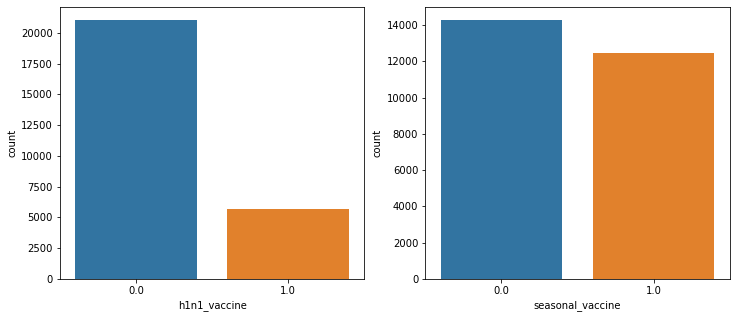

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="h1n1_vaccine", data=dfc, ax=ax1)
sns.countplot(x="seasonal_vaccine", data=dfc, ax=ax2)
plt.show()

In [8]:
perc_h1n1_vaccinated = dfc[dfc['h1n1_vaccine']==1]['h1n1_vaccine'].count()/(dfc[dfc['h1n1_vaccine']==1]['h1n1_vaccine'].count()+dfc[dfc['h1n1_vaccine']==0]['h1n1_vaccine'].count())*100
perc_h1n1_NOT_vaccinated = 100- perc_h1n1_vaccinated

print("Percentage of people vaccinated for h1n1: ", perc_h1n1_vaccinated)
print("Percentage of people NOT vaccinated for h1n1: ", perc_h1n1_NOT_vaccinated)

Percentage of people vaccinated for h1n1:  21.24536638334519
Percentage of people NOT vaccinated for h1n1:  78.75463361665481


In [9]:
perc_seasonal_vaccinated = dfc[dfc['seasonal_vaccine']==1]['seasonal_vaccine'].count()/(dfc[dfc['seasonal_vaccine']==1]['seasonal_vaccine'].count()+dfc[dfc['seasonal_vaccine']==0]['seasonal_vaccine'].count())*100
perc_seasonal_NOT_vaccinated = 100- perc_seasonal_vaccinated

print("Percentage of people vaccinated for seasonal: ", perc_seasonal_vaccinated)
print("Percentage of people NOT vaccinated for seasonal: ", perc_seasonal_NOT_vaccinated)

Percentage of people vaccinated for seasonal:  46.56082674954132
Percentage of people NOT vaccinated for seasonal:  53.43917325045868


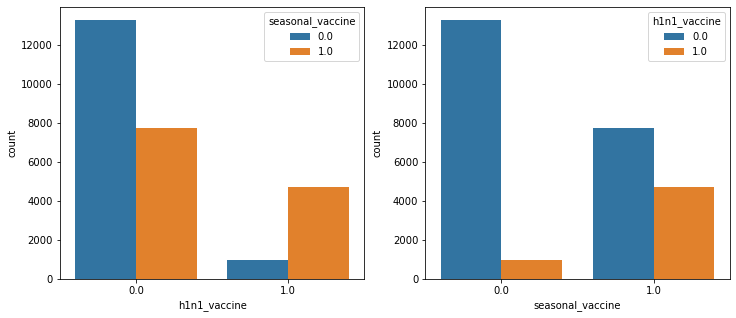

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="h1n1_vaccine", hue="seasonal_vaccine", data=dfc, ax=ax1)
sns.countplot(x="seasonal_vaccine", hue="h1n1_vaccine", data=dfc, ax=ax2)
plt.show()

In [11]:
def createMatrix(df, column1, column2):
    nulNul = df.groupby([column1,column2])[column1].count().values[0]
    nulEen = df.groupby([column1,column2])[column1].count().values[1]
    eenNul = df.groupby([column1,column2])[column1].count().values[2]
    eenEen = df.groupby([column1,column2])[column1].count().values[3]
    newArr = [[nulNul, nulEen], [eenNul,eenEen]]
    ax = sns.heatmap(newArr/np.sum(newArr), annot=True, 
            fmt='.2%')
    ax.set_xlabel(column2)
    ax.set_ylabel(column1)
    plt.show()

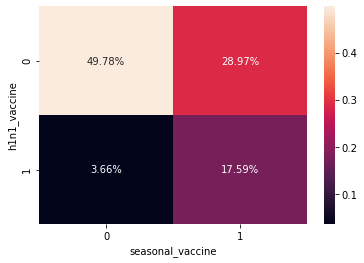

In [12]:
createMatrix(dfc, 'h1n1_vaccine','seasonal_vaccine')

Conclusion:<br>
The classes for seasonal_vaccine are relatively in balance.<br>
The classes for h1n1 are highly imbalanced.<br>
If you had the h1n1_vaccine, chances are you also had the seasonal_vaccine.<br>
If you did NOT have the seasonal_vaccine, chances are you also did not have the h1n1_vaccine.<br>

### Deal with missing values

### Numerical

In [13]:
# Seperate numerical and categorical data
numerical = [col for col in dfc.columns if dfc.dtypes[col] == 'float64']
categorical = [col for col in dfc.columns if dfc.dtypes[col] == 'object']

In [14]:
# Remove dependent variables from list and add them to own list
numerical.remove('h1n1_vaccine')
numerical.remove('seasonal_vaccine')

dependent = ['h1n1_vaccine','seasonal_vaccine']

In [15]:
dfc[numerical].head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


In [16]:
dfc[numerical].isna().sum().sort_values(ascending=False)

health_insurance               24502
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
opinion_seas_sick_from_vacc     1058
opinion_seas_risk               1013
opinion_seas_vacc_effective      914
opinion_h1n1_vacc_effective      789
opinion_h1n1_sick_from_vacc      770
opinion_h1n1_risk                768
household_adults                 474
household_children               474
behavioral_avoidance             421
behavioral_touch_face            256
h1n1_knowledge                   238
h1n1_concern                     177
behavioral_outside_home          164
behavioral_large_gatherings      159
behavioral_antiviral_meds        150
behavioral_wash_hands             82
behavioral_face_mask              38
dtype: int64

- health_insurance > binary
- doctor_recc_h1n1 > H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal > Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition > Has any of the following chronic medical conditions. (binary)
- child_under_6_months > Has regular close contact with a child under the age of six months. (binary)
- health_worker > Is a healthcare worker. (binary)
- opinion_seas_sick_from_vacc  > Respondent's worry of getting sick from taking seasonal flu vaccine. (1-5)
- opinion_seas_risk  > Respondent's opinion about risk of getting sick with seasonal flu without vaccine. (1-5)
- opinion_seas_vacc_effective > Respondent's opinion about seasonal flu vaccine effectiveness. (1-5)
- opinion_h1n1_vacc_effective > Respondent's opinion about risk of getting sick with seasonal flu without vaccine. (1-5)
- opinion_h1n1_sick_from_vacc > Respondent's worry of getting sick from taking H1N1 vaccine. (1-5)
- opinion_h1n1_risk > Respondent's opinion about risk of getting sick with H1N1 flu without vaccine. (1-5)
- household_adults > Number of other adults in household, top-coded to 3.
- household_children > Number of children in household, top-coded to 3.
- behavioral_avoidance  > Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_touch_face > Has avoided touching eyes, nose, or mouth. (binary)
- h1n1_knowledge > Level of knowledge about H1N1 flu. (0-2)
- h1n1_concern > Level of concern about the H1N1 flu. (0-3)
- behavioral_outside_home > Has reduced contact with people outside of own household. (binary)
- behavioral_large_gatherings > Has reduced time at large gatherings. (binary)
- behavioral_antiviral_meds > Has taken antiviral medications. (binary)
- behavioral_wash_hands > Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_face_mask > Has bought a face mask. (binary)

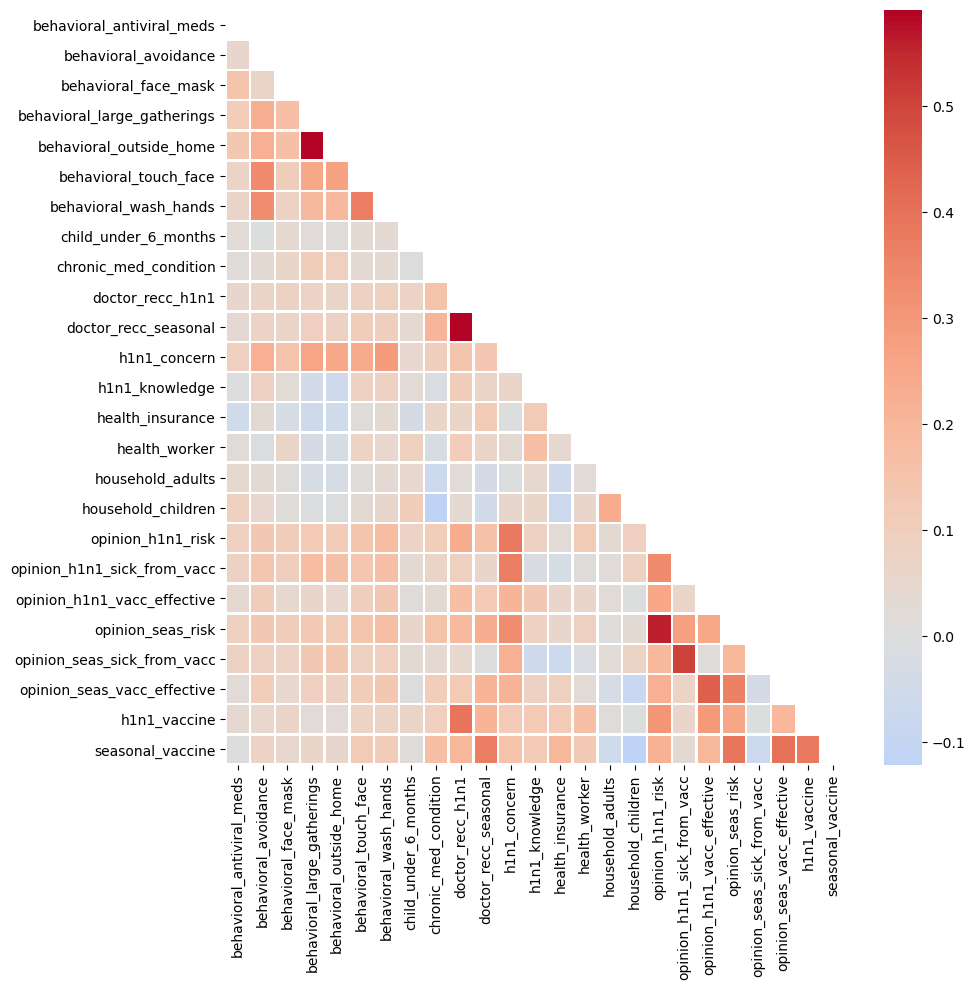

In [17]:
numerical_correlation = sorted(numerical) + dependent
correlation = dfc[numerical_correlation].corr(method="spearman")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(10,10), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", center=0, linewidths=1, fmt=".2f")

#### Health Insurance

<AxesSubplot:xlabel='health_insurance', ylabel='count'>

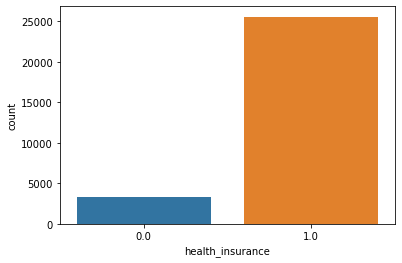

In [18]:
sns.countplot(x="health_insurance", data=dfc)

In [19]:
perc_uninsured = dfc[dfc['health_insurance']==0]['health_insurance'].count()/(dfc[dfc['health_insurance']==0]['health_insurance'].count()+dfc[dfc['health_insurance']==1]['health_insurance'].count()) *100
perc_insured = 100-perc_uninsured

print('percentage uninsured: ', perc_uninsured)
print('percentage insured: ', perc_insured)

percentage uninsured:  11.61761145505482
percentage insured:  88.38238854494517


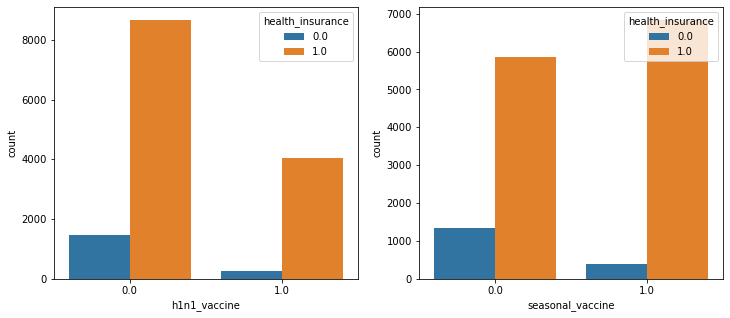

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="h1n1_vaccine", hue="health_insurance", data=dfc, ax=ax1)
sns.countplot(x="seasonal_vaccine", hue="health_insurance", data=dfc, ax=ax2)
plt.show()

In [21]:
def createTwoMatrix(df, column1, column2, column3):
    nulNulA = df.groupby([column1,column2])[column1].count().values[0]
    nulEenA = df.groupby([column1,column2])[column1].count().values[1]
    eenNulA = df.groupby([column1,column2])[column1].count().values[2]
    eenEenA = df.groupby([column1,column2])[column1].count().values[3]
    newArrA = [[nulNulA, nulEenA], [eenNulA,eenEenA]]
    
    nulNulB = df.groupby([column1,column3])[column1].count().values[0]
    nulEenB = df.groupby([column1,column3])[column1].count().values[1]
    eenNulB = df.groupby([column1,column3])[column1].count().values[2]
    eenEenB = df.groupby([column1,column3])[column1].count().values[3]
    newArrB = [[nulNulB, nulEenB], [eenNulB,eenEenB]]
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    sns.heatmap(newArrA/np.sum(newArrB), annot=True, 
            fmt='.2%', cmap="Blues", ax=ax1)
    ax1.set_xlabel(column2)
    ax1.set_ylabel(column1)
    sns.heatmap(newArrB/np.sum(newArrB), annot=True, 
            fmt='.2%', cmap="Blues", ax=ax2)
    ax2.set_xlabel(column3)
    ax2.set_ylabel(column1)
    plt.show()

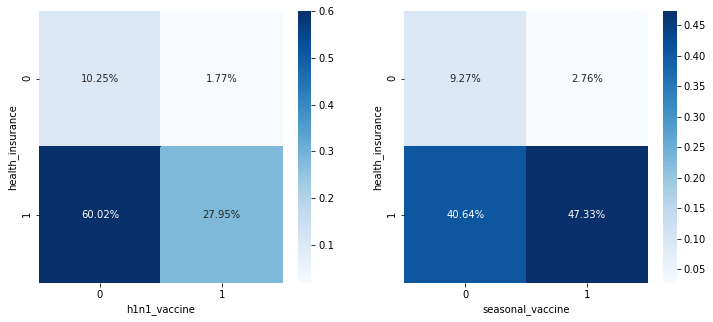

In [22]:
createTwoMatrix(dfc, "health_insurance", "h1n1_vaccine", "seasonal_vaccine")

##### column for na values for health insurance

In [23]:
dfc['nan_health_insurance'] = dfc.apply(lambda row: 1 if row.health_insurance != row.health_insurance else 0, axis=1)

In [24]:
dfc['health_insurance_1'] = dfc.apply(lambda row: 1 if row.health_insurance == 0 else 0, axis=1)

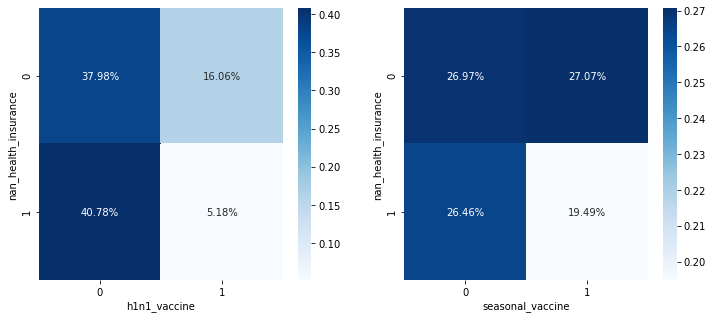

In [25]:
createTwoMatrix(dfc, "nan_health_insurance", "h1n1_vaccine", "seasonal_vaccine")

???:                               
- 40.8% no h1n1                           25.% no seas
Insured:
- 60% no h1n1                             40.6% no seas
Not insured:
- 10.3% no h1n1                           9.3% no seas

???
- 5.2% YES h1n1                           19.5% YES seas
Insured:
- 28% YES h1n1                            47.3% YES seas
Not insured:
- 1.8% YES h1n1                           2.8% YES seas

In [26]:
dfc[['health_insurance','nan_health_insurance']]

,health_insurance,nan_health_insurance
respondent_id,,
0,1.0,0
1,1.0,0
2,NaN,1
3,NaN,1
4,NaN,1
...,...,...
53410,NaN,1
53411,0.0,0
53412,1.0,0


##### model Health_insurance

In [27]:
health = dfc[numerical]

In [28]:
health_test = health[health['health_insurance'].isna()]
health_train = health[health['health_insurance'].notna()]

In [29]:
health_test = health_test.drop(columns=["health_insurance"])

In [30]:
health_train = health_train.dropna()
health_test = health_test.dropna()

In [31]:
x1 = health_train.drop(columns=["health_insurance"]).values
y1 = health_train["health_insurance"].values
x2 = health_test.values

In [32]:
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
predictions = model.predict_proba(x_test)
pred = model.predict(x_test)

In [35]:
print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))

accuracy: 0.8876757957068838
f1: 0.8367952479230507


In [36]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred), 'predictions': list(predictions)}, columns=['y_test', 'pred', 'predictions'])

In [37]:
dataset[(dataset['y_test']==0) & (dataset['pred']==0)]

,y_test,pred,predictions
1480,0.0,0.0,"[0.5677626801270819, 0.4322373198729182]"
1786,0.0,0.0,"[0.511414293738214, 0.488585706261786]"
3250,0.0,0.0,"[0.5787068132994966, 0.42129318670050336]"
3748,0.0,0.0,"[0.5890383101218273, 0.41096168987817266]"
3856,0.0,0.0,"[0.7205151246073337, 0.2794848753926663]"


In [38]:
dataset['predictions_0'] = 1

In [39]:
print("accuracy:", accuracy_score(y_test, dataset['predictions_0']))
print("f1:", f1_score(y_test, dataset['predictions_0'], average='weighted'))

accuracy: 0.887860843819393
f1: 0.8351218052627813


In [40]:
model.fit(x1, y1)

LogisticRegression()

In [41]:
toImpute = model.predict(x2)

In [42]:
# Add toImpute list as 'Imp_health_insurance' column to health_test dataframe
health_test['Imp_health_insurance'] = toImpute

In [43]:
health_test = health_test[['Imp_health_insurance']]

##### Create Imp_health_insurance column

In [44]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, health_test], axis=1)

In [45]:
# Fill NA values in Imp_health_insurance with values, if no value impute 1
dfc['Imp_health_insurance'] = dfc.apply(lambda row: row.Imp_health_insurance if row.Imp_health_insurance == row.Imp_health_insurance else
                                        (row.health_insurance if row.health_insurance == row.health_insurance else 1), axis = 1)

In [46]:
numerical.remove('health_insurance')

In [47]:
numerical.append('Imp_health_insurance')
numerical.append('health_insurance_1')

Options:
1. health_insurance_1 > boolean 1 for false: No insurance
2. drop it, since the column contains a lot of nan
3. Imp_health_insurance > imputed 

#### doctor_recc_h1n1

In [48]:
dfc[numerical].isna().sum().sort_values(ascending=False)

doctor_recc_h1n1               4320
doctor_recc_seasonal           4320
chronic_med_condition          1903
child_under_6_months           1633
health_worker                  1593
opinion_seas_sick_from_vacc    1058
opinion_seas_risk              1013
opinion_seas_vacc_effective     914
opinion_h1n1_vacc_effective     789
opinion_h1n1_sick_from_vacc     770
opinion_h1n1_risk               768
household_children              474
household_adults                474
behavioral_avoidance            421
behavioral_touch_face           256
h1n1_knowledge                  238
h1n1_concern                    177
behavioral_outside_home         164
behavioral_large_gatherings     159
behavioral_antiviral_meds       150
behavioral_wash_hands            82
behavioral_face_mask             38
Imp_health_insurance              0
health_insurance_1                0
dtype: int64

<AxesSubplot:xlabel='doctor_recc_h1n1', ylabel='count'>

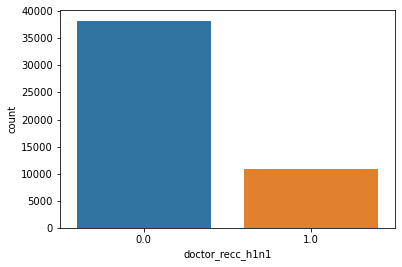

In [49]:
sns.countplot(x="doctor_recc_h1n1", data=dfc)

In [50]:
perc_doctor_NOT_recc_h1n1 = dfc[dfc['doctor_recc_h1n1']==0]['doctor_recc_h1n1'].count()/(dfc[dfc['doctor_recc_h1n1']==0]['doctor_recc_h1n1'].count()+dfc[dfc['doctor_recc_h1n1']==1]['doctor_recc_h1n1'].count()) *100
perc_doctor_recc_h1n1 = 100-perc_doctor_NOT_recc_h1n1

print('percentage not recommended h1n1: ', perc_doctor_NOT_recc_h1n1)
print('percentage recommended h1n1: ', perc_doctor_recc_h1n1)

percentage not recommended h1n1:  77.85110500050921
percentage recommended h1n1:  22.148894999490793


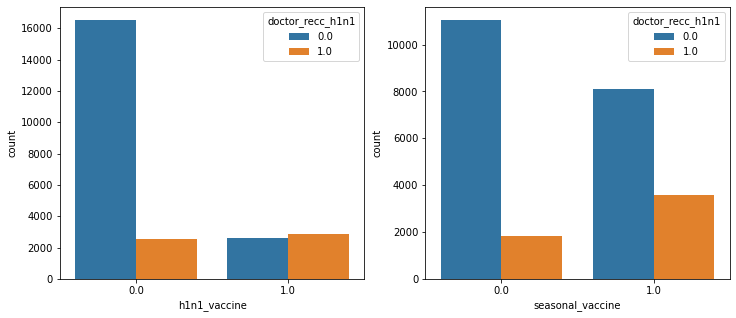

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="h1n1_vaccine", hue="doctor_recc_h1n1", data=dfc, ax=ax1)
sns.countplot(x="seasonal_vaccine", hue="doctor_recc_h1n1", data=dfc, ax=ax2)
plt.show()

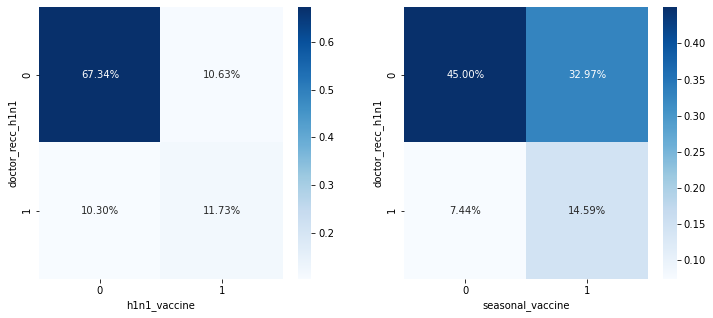

In [52]:
createTwoMatrix(dfc, "doctor_recc_h1n1", "h1n1_vaccine", "seasonal_vaccine")

Conclusion:<br>
In 22% of the cases, the doctor recommended a person to get the vaccine.<br>
A little over half of the people whom were recommended to take the vaccine, also took it.

##### column for na values for doctor recommended h1n1

In [53]:
dfc['nan_doctor_rec_h1n1'] = dfc.apply(lambda row: 1 if row.doctor_recc_h1n1 != row.doctor_recc_h1n1 else 0, axis=1)

In [54]:
dfc['doctor_recc_h1n1_1'] = dfc.apply(lambda row: 1 if row.doctor_recc_h1n1 == 1 else 0, axis=1)

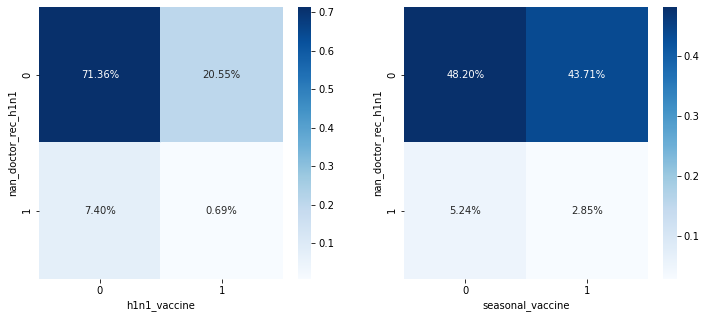

In [55]:
createTwoMatrix(dfc, "nan_doctor_rec_h1n1", "h1n1_vaccine", "seasonal_vaccine")

##### model h1n1_vaccine

In [56]:
h1n1_vaccine = dfc[numerical]

# Drop the doctor_recc_seasonal column and health_insurance column
h1n1_vaccine = h1n1_vaccine.drop(columns=["doctor_recc_seasonal"])

h1n1_vaccine_test = h1n1_vaccine[h1n1_vaccine['doctor_recc_h1n1'].isna()]
h1n1_vaccine_train = h1n1_vaccine[h1n1_vaccine['doctor_recc_h1n1'].notna()]

h1n1_vaccine_test = h1n1_vaccine_test.drop(columns=["doctor_recc_h1n1"])

In [57]:
h1n1_vaccine_train = h1n1_vaccine_train.dropna()
h1n1_vaccine_test = h1n1_vaccine_test.dropna()

In [58]:
x1 = h1n1_vaccine_train.drop(columns=["doctor_recc_h1n1"]).values
y1 = h1n1_vaccine_train["doctor_recc_h1n1"].values
x2 = h1n1_vaccine_test.values

In [59]:
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

In [60]:
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [61]:
predictions = model.predict_proba(x_test)
pred = model.predict(x_test)

In [62]:
print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))

accuracy: 0.7810663764961915
f1: 0.7260857723840495


In [63]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred), 'predictions': list(predictions)}, columns=['y_test', 'pred', 'predictions'])

In [64]:
dataset['1'] = 0

In [65]:
print("accuracy:", accuracy_score(y_test, dataset['1'] ))
print("f1:", f1_score(y_test, dataset['1'] , average='weighted'))

accuracy: 0.7736670293797606
f1: 0.6749414207227115


In [66]:
toImpute = model.predict(x2)

In [67]:
# Add toImpute list as 'Imp_doctor_recc_h1n1' column to h1n1_vaccine_test dataframe
h1n1_vaccine_test['Imp_doctor_recc_h1n1'] = toImpute

In [68]:
h1n1_vaccine_test = h1n1_vaccine_test[['Imp_doctor_recc_h1n1']]

##### Create Imp_doctor_recc_h1n1 column

In [69]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, h1n1_vaccine_test], axis=1)

In [70]:
model.fit(x1, y1)

LogisticRegression(max_iter=10000)

In [71]:
# Fill NA values in Imp_doctor_recc_h1n1 with values, if no value impute 0
dfc['Imp_doctor_recc_h1n1'] = dfc.apply(lambda row: row.Imp_doctor_recc_h1n1 if row.Imp_doctor_recc_h1n1 == row.Imp_doctor_recc_h1n1 else
                                        (row.doctor_recc_h1n1 if row.doctor_recc_h1n1 == row.doctor_recc_h1n1 else 0), axis = 1)

In [72]:
numerical.remove('doctor_recc_h1n1')

In [73]:
numerical.append('Imp_doctor_recc_h1n1')
numerical.append('doctor_recc_h1n1_1')

Options:
1. Imp_doctor_recc_h1n1 
2. doctor_recc_h1n1_1 > Boolean 
3. other imputer (not yet executed)

#### doctor_recc_seasonal

<AxesSubplot:xlabel='doctor_recc_seasonal', ylabel='count'>

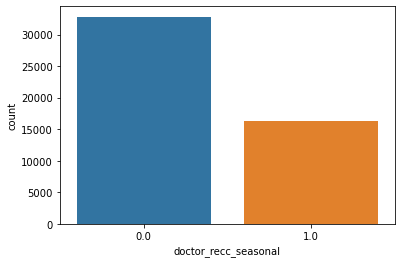

In [74]:
sns.countplot(x="doctor_recc_seasonal", data=dfc)

In [75]:
perc_doctor_NOT_recc_seasonal = dfc[dfc['doctor_recc_seasonal']==0]['doctor_recc_seasonal'].count()/(dfc[dfc['doctor_recc_seasonal']==0]['doctor_recc_seasonal'].count()+dfc[dfc['doctor_recc_seasonal']==1]['doctor_recc_seasonal'].count()) *100
doctor_recc_seasonal = 100-perc_doctor_NOT_recc_seasonal

print('percentage not recommended seasonal: ', perc_doctor_NOT_recc_seasonal)
print('percentage recommended seasonal: ', doctor_recc_seasonal)

percentage not recommended seasonal:  66.8357266524086
percentage recommended seasonal:  33.164273347591404


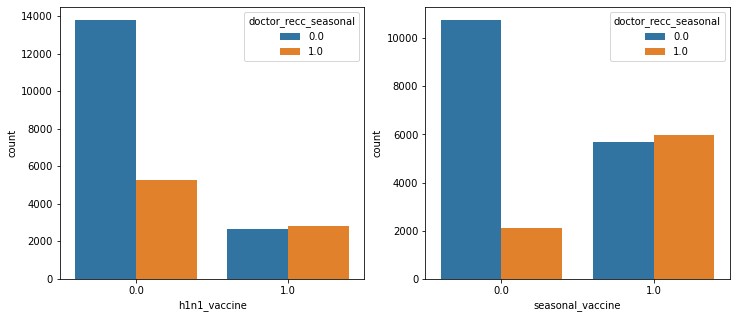

In [76]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="h1n1_vaccine", hue="doctor_recc_seasonal", data=dfc, ax=ax1)
sns.countplot(x="seasonal_vaccine", hue="doctor_recc_seasonal", data=dfc, ax=ax2)
plt.show()

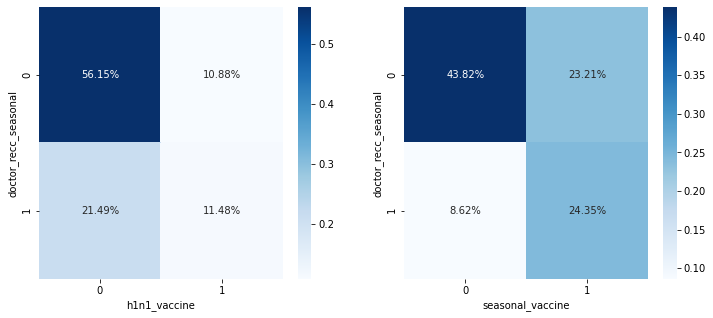

In [77]:
createTwoMatrix(dfc, "doctor_recc_seasonal", "h1n1_vaccine", "seasonal_vaccine")

In [78]:
recommended_pl_received = dfc[(dfc['doctor_recc_seasonal']==1) & (dfc['seasonal_vaccine']==1)]['doctor_recc_seasonal'].count()
recommended_pl_NOT_received = dfc[(dfc['doctor_recc_seasonal']==1) & (dfc['seasonal_vaccine']==0)]['doctor_recc_seasonal'].count()
NOT_recommended_pl_NOT_received = dfc[(dfc['doctor_recc_seasonal']==0) & (dfc['seasonal_vaccine']==0)]['doctor_recc_seasonal'].count()
NOT_recommended_pl_received = dfc[(dfc['doctor_recc_seasonal']==0) & (dfc['seasonal_vaccine']==1)]['doctor_recc_seasonal'].count()

perc_recommended_pl_received = recommended_pl_received/(recommended_pl_received+recommended_pl_NOT_received+NOT_recommended_pl_NOT_received+NOT_recommended_pl_received)*100
perc_recommended_pl_NOT_received = recommended_pl_NOT_received/(recommended_pl_received+recommended_pl_NOT_received+NOT_recommended_pl_NOT_received+NOT_recommended_pl_received)*100
perc_NOT_recommended_pl_NOT_received = NOT_recommended_pl_NOT_received/(recommended_pl_received+recommended_pl_NOT_received+NOT_recommended_pl_NOT_received+NOT_recommended_pl_received)*100
perc_NOT_recommended_pl_received = NOT_recommended_pl_received/(recommended_pl_received+recommended_pl_NOT_received+NOT_recommended_pl_NOT_received+NOT_recommended_pl_received)*100

In [79]:
print("Percentage recommended and received seasonal vaccine: ", perc_recommended_pl_received)
print("Percentage recommended and NOT received seasonal vaccine: ", perc_recommended_pl_NOT_received)
print("Percentage NOT recommended and NOT received seasonal vaccine: ", perc_NOT_recommended_pl_NOT_received)
print("Percentage NOT recommended and received seasonal vaccine: ", perc_NOT_recommended_pl_received)

Percentage recommended and received seasonal vaccine:  24.349207642481772
Percentage recommended and NOT received seasonal vaccine:  8.624271805108567
Percentage NOT recommended and NOT received seasonal vaccine:  43.81798183077362
Percentage NOT recommended and received seasonal vaccine:  23.208538721636046


Conclusion:<br>
Around 47.5% of the people received the seasonal_vaccine.<br>
To 33%, the seasonal vaccine was recommended.<br>
From the people who got the seasonal_vaccine, a litlle over half was on recommendation by the doktor. <br>
A small group of people (8.6%) received the recommendation but did not get the vaccine.<br>
Almost 44% of the people did not get a recommendation and did not get the vaccine.<br>

##### column for na values for doctor recommended seasonal

In [80]:
dfc['nan_doctor_rec_seas'] = dfc.apply(lambda row: 1 if row.doctor_recc_seasonal != row.doctor_recc_seasonal else 0, axis=1)

In [81]:
dfc['doctor_rec_seas_1'] = dfc.apply(lambda row: 1 if row.doctor_recc_seasonal == 1 else 0, axis=1)

##### model seasonal_vaccine

In [82]:
dfc[numerical].isna().sum().sort_values(ascending=False)

doctor_recc_seasonal           4320
chronic_med_condition          1903
child_under_6_months           1633
health_worker                  1593
opinion_seas_sick_from_vacc    1058
opinion_seas_risk              1013
opinion_seas_vacc_effective     914
opinion_h1n1_vacc_effective     789
opinion_h1n1_sick_from_vacc     770
opinion_h1n1_risk               768
household_children              474
household_adults                474
behavioral_avoidance            421
behavioral_touch_face           256
h1n1_knowledge                  238
h1n1_concern                    177
behavioral_outside_home         164
behavioral_large_gatherings     159
behavioral_antiviral_meds       150
behavioral_wash_hands            82
behavioral_face_mask             38
Imp_health_insurance              0
health_insurance_1                0
Imp_doctor_recc_h1n1              0
doctor_recc_h1n1_1                0
dtype: int64

In [83]:
seasonal_vaccine = dfc[numerical]

seasonal_vaccine_test = seasonal_vaccine[seasonal_vaccine['doctor_recc_seasonal'].isna()]
seasonal_vaccine_train = seasonal_vaccine[seasonal_vaccine['doctor_recc_seasonal'].notna()]

seasonal_vaccine_test = seasonal_vaccine_test.drop(columns=["doctor_recc_seasonal"])

In [84]:
seasonal_vaccine_train = seasonal_vaccine_train.dropna()
seasonal_vaccine_test = seasonal_vaccine_test.dropna()

In [85]:
x1 = seasonal_vaccine_train.drop(columns=["doctor_recc_seasonal"]).values
y1 = seasonal_vaccine_train["doctor_recc_seasonal"].values
x2 = seasonal_vaccine_test.values

In [86]:
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

In [87]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [88]:
predictions = model.predict_proba(x_test)
pred = model.predict(x_test)

In [89]:
print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))

accuracy: 0.8290533188248096
f1: 0.8199571684461195


In [90]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred), 'predictions': list(predictions)}, columns=['y_test', 'pred', 'predictions'])

In [91]:
dataset['0'] = 0

In [92]:
print("accuracy:", accuracy_score(y_test, dataset['0']))
print("f1:", f1_score(y_test, dataset['0'], average='weighted'))

accuracy: 0.6671381936887921
f1: 0.533936983944388


In [93]:
model.fit(x1, y1)

LogisticRegression(max_iter=10000)

In [94]:
toImpute = model.predict(x2)

In [95]:
# Add toImpute list as 'Imp_doctor_recc_seasonal' column to seasonal_vaccine_test dataframe
seasonal_vaccine_test['Imp_doctor_recc_seasonal'] = toImpute

In [96]:
seasonal_vaccine_test = seasonal_vaccine_test[['Imp_doctor_recc_seasonal']]

##### Create Imp_doctor_recc_seasonal column

In [97]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, seasonal_vaccine_test], axis=1)

In [98]:
# Fill NA values in Imp_doctor_recc_h1n1 with values, if no value impute 0
dfc['Imp_doctor_recc_seasonal'] = dfc.apply(lambda row: row.Imp_doctor_recc_seasonal if row.Imp_doctor_recc_seasonal == row.Imp_doctor_recc_seasonal else
                                        (row.doctor_recc_seasonal if row.doctor_recc_seasonal == row.doctor_recc_seasonal else 0), axis = 1)

In [99]:
numerical.remove('doctor_recc_seasonal')

In [100]:
numerical.append('Imp_doctor_recc_seasonal')
numerical.append('doctor_rec_seas_1')

Options:
1. Imp_doctor_recc_seasonal
2. doctor_rec_seas_1 > Boolean

In [101]:
dfc[numerical].isna().sum().sort_values(ascending=False)

chronic_med_condition          1903
child_under_6_months           1633
health_worker                  1593
opinion_seas_sick_from_vacc    1058
opinion_seas_risk              1013
opinion_seas_vacc_effective     914
opinion_h1n1_vacc_effective     789
opinion_h1n1_sick_from_vacc     770
opinion_h1n1_risk               768
household_children              474
household_adults                474
behavioral_avoidance            421
behavioral_touch_face           256
h1n1_knowledge                  238
h1n1_concern                    177
behavioral_outside_home         164
behavioral_large_gatherings     159
behavioral_antiviral_meds       150
behavioral_wash_hands            82
behavioral_face_mask             38
Imp_health_insurance              0
health_insurance_1                0
Imp_doctor_recc_h1n1              0
doctor_recc_h1n1_1                0
Imp_doctor_recc_seasonal          0
doctor_rec_seas_1                 0
dtype: int64

#### chronic_med_condition           

<AxesSubplot:xlabel='chronic_med_condition', ylabel='count'>

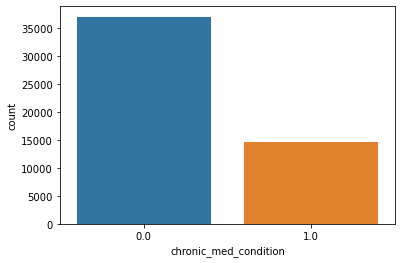

In [102]:
sns.countplot(x="chronic_med_condition", data=dfc)

In [103]:
perc_med_condition = dfc[dfc['chronic_med_condition']==1]['chronic_med_condition'].count()/(dfc[dfc['chronic_med_condition']==0]['chronic_med_condition'].count()+dfc[dfc['chronic_med_condition']==1]['chronic_med_condition'].count()) *100
perc_NOT_med_condition = 100-perc_med_condition

print('percentage no medical condition: ', perc_NOT_med_condition)
print('percentage with medical condition: ', perc_med_condition)

percentage no medical condition:  71.78521509551172
percentage with medical condition:  28.214784904488276


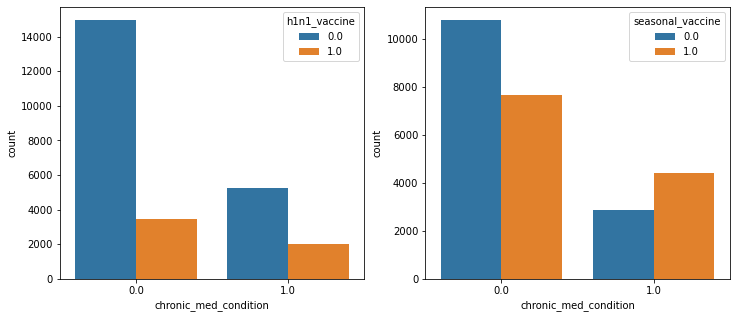

In [104]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="chronic_med_condition", hue="h1n1_vaccine", data=dfc, ax=ax1)
sns.countplot(x="chronic_med_condition", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.show()

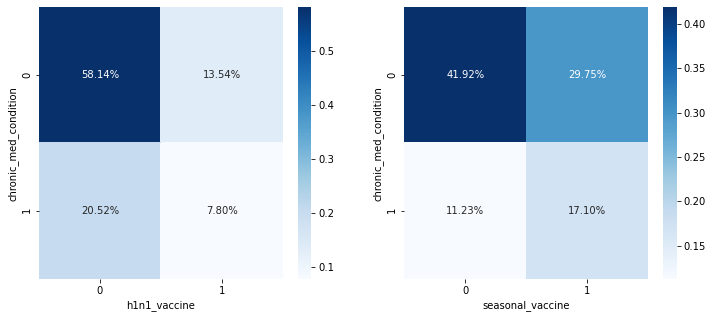

In [105]:
createTwoMatrix(dfc, "chronic_med_condition", "h1n1_vaccine", "seasonal_vaccine")

Conclusion:
28.2% of the people has a medical condition

#### Column for na values chronic_med_condition

In [106]:
dfc['nan_chronic_med_condition'] = dfc.apply(lambda row: 1 if row.chronic_med_condition != row.chronic_med_condition else 0, axis=1)

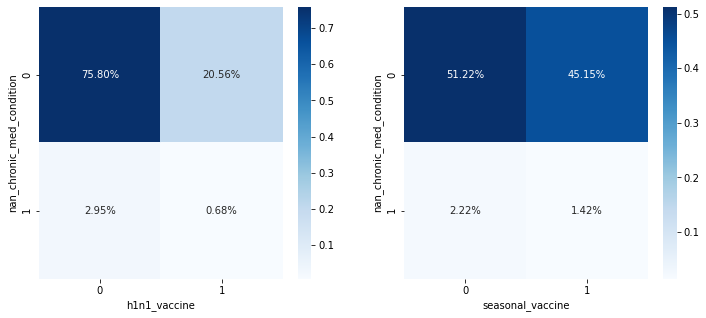

In [107]:
createTwoMatrix(dfc, "nan_chronic_med_condition", "h1n1_vaccine", "seasonal_vaccine")

In [108]:
dfc['chronic_med_condition_1'] = dfc.apply(lambda row: 1 if row.chronic_med_condition == 1 else 0, axis=1)

#### Model chronical medical condition

In [109]:
med_condition = dfc[numerical]

med_condition_test = med_condition[med_condition['chronic_med_condition'].isna()]
med_condition_train = med_condition[med_condition['chronic_med_condition'].notna()]

med_condition_test = med_condition_test.drop(columns=["chronic_med_condition"])

# Drop rows with NA values
med_condition_train = med_condition_train.dropna()
med_condition_test = med_condition_test.dropna()

# Prep data for model
x1 = med_condition_train.drop(columns=["chronic_med_condition"]).values
y1 = med_condition_train["chronic_med_condition"].values
x2 = med_condition_test.values

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

# Build model and fit it
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict_proba(x_test)
pred = model.predict(x_test)

print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))

accuracy: 0.7319088893368273
f1: 0.6701360313982662


In [110]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred), 'predictions': list(predictions)}, columns=['y_test', 'pred', 'predictions'])

dataset['1'] = 0

print("accuracy:", accuracy_score(y_test, dataset['1']))
print("f1:", f1_score(y_test, dataset['1'], average='weighted'))

accuracy: 0.7149768191896795
f1: 0.5961501593008447


In [111]:
model.fit(x1, y1)

toImpute = model.predict(x2)


In [112]:
# Add toImpute list as 'Imp_chronic_med_condition' column to med_condition_test dataframe
med_condition_test['Imp_chronic_med_condition'] = toImpute

med_condition_test = med_condition_test[['Imp_chronic_med_condition']]

##### Create Imp_chronic_med_condition column

In [113]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, med_condition_test], axis=1)

# Fill NA values in Imp_doctor_recc_h1n1 with values, if no value impute 0
dfc['Imp_chronic_med_condition'] = dfc.apply(lambda row: row.Imp_chronic_med_condition if row.Imp_chronic_med_condition == row.Imp_chronic_med_condition else
                                        (row.chronic_med_condition if row.chronic_med_condition == row.chronic_med_condition else 0), axis = 1)

# Add the new column to the numerical list
numerical.append('Imp_chronic_med_condition')
numerical.append('chronic_med_condition_1')

In [114]:
dfc.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Imp_health_insurance,nan_doctor_rec_h1n1,doctor_recc_h1n1_1,Imp_doctor_recc_h1n1,nan_doctor_rec_seas,doctor_rec_seas_1,Imp_doctor_recc_seasonal,nan_chronic_med_condition,chronic_med_condition_1,Imp_chronic_med_condition
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0,0,0.0,0,0,0.0,0,0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0,0,0.0,0,0,0.0,0,0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,1,0,0.0,1,0,0.0,0,1,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0,0,0.0,0,1,1.0,0,1,1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0,0,0.0,0,0,0.0,0,0,0.0


In [115]:
numerical.remove('chronic_med_condition')

Options (no clear preference for either one at this moment):
1. Imp_chronic_med_condition
2. chronic_med_condition_1 > boolean

In [116]:
dfc[numerical].isna().sum().sort_values(ascending=False)

child_under_6_months           1633
health_worker                  1593
opinion_seas_sick_from_vacc    1058
opinion_seas_risk              1013
opinion_seas_vacc_effective     914
opinion_h1n1_vacc_effective     789
opinion_h1n1_sick_from_vacc     770
opinion_h1n1_risk               768
household_children              474
household_adults                474
behavioral_avoidance            421
behavioral_touch_face           256
h1n1_knowledge                  238
h1n1_concern                    177
behavioral_outside_home         164
behavioral_large_gatherings     159
behavioral_antiviral_meds       150
behavioral_wash_hands            82
behavioral_face_mask             38
Imp_health_insurance              0
health_insurance_1                0
Imp_doctor_recc_h1n1              0
doctor_recc_h1n1_1                0
Imp_doctor_recc_seasonal          0
doctor_rec_seas_1                 0
Imp_chronic_med_condition         0
chronic_med_condition_1           0
dtype: int64

### child_under_6_months          
##### Has regular close contact with a child under the age of six months. (binary)

<AxesSubplot:xlabel='child_under_6_months', ylabel='count'>

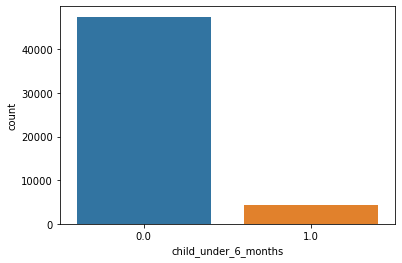

In [117]:
sns.countplot(x="child_under_6_months", data=dfc)

In [118]:
perc_contact_child = dfc[dfc['child_under_6_months']==1]['child_under_6_months'].count()/(dfc[dfc['child_under_6_months']==0]['child_under_6_months'].count()+dfc[dfc['child_under_6_months']==1]['child_under_6_months'].count()) *100
perc_NO_contact_child = 100-perc_contact_child

print('percentage without contact with young child: ', perc_NO_contact_child)
print('percentage with contact with young child: ', perc_contact_child)

percentage without contact with young child:  91.55498049515276
percentage with contact with young child:  8.445019504847243


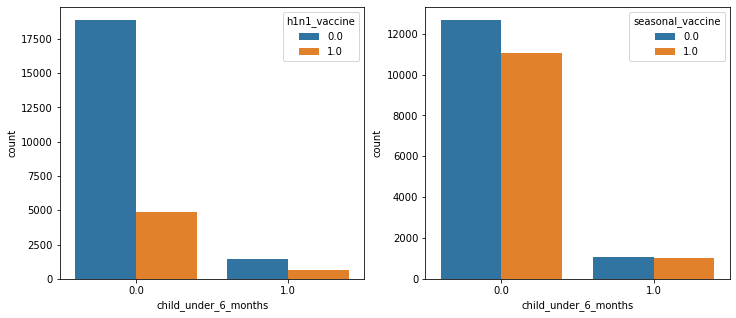

In [119]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="child_under_6_months", hue="h1n1_vaccine", data=dfc, ax=ax1)
sns.countplot(x="child_under_6_months", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.show()

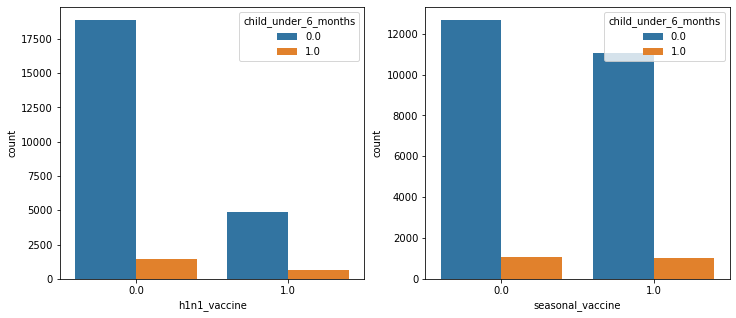

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="h1n1_vaccine", hue="child_under_6_months", data=dfc, ax=ax1)
sns.countplot(x="seasonal_vaccine", hue="child_under_6_months", data=dfc, ax=ax2)
plt.show()

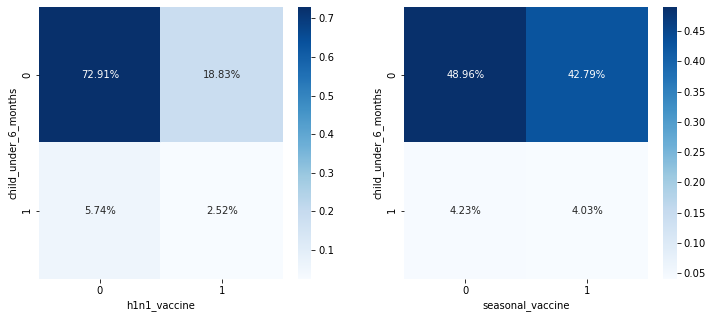

In [121]:
createTwoMatrix(dfc, "child_under_6_months", "h1n1_vaccine", "seasonal_vaccine")

In [122]:
dfc['child_under_6M'] = dfc.apply(lambda row: 1 if row.child_under_6_months == 1 else 0, axis=1)

In [123]:
numerical.remove('child_under_6_months')

# Add the new column to the numerical list
numerical.append('child_under_6M')

Options:
1. child_under_6M > boolean 1 if true
2. drop column

In [124]:
dfc[numerical].isna().sum().sort_values(ascending=False)

health_worker                  1593
opinion_seas_sick_from_vacc    1058
opinion_seas_risk              1013
opinion_seas_vacc_effective     914
opinion_h1n1_vacc_effective     789
opinion_h1n1_sick_from_vacc     770
opinion_h1n1_risk               768
household_children              474
household_adults                474
behavioral_avoidance            421
behavioral_touch_face           256
h1n1_knowledge                  238
h1n1_concern                    177
behavioral_outside_home         164
behavioral_large_gatherings     159
behavioral_antiviral_meds       150
behavioral_wash_hands            82
behavioral_face_mask             38
Imp_health_insurance              0
health_insurance_1                0
Imp_doctor_recc_h1n1              0
doctor_recc_h1n1_1                0
Imp_doctor_recc_seasonal          0
doctor_rec_seas_1                 0
Imp_chronic_med_condition         0
chronic_med_condition_1           0
child_under_6M                    0
dtype: int64

### Health worker

<AxesSubplot:xlabel='health_worker', ylabel='count'>

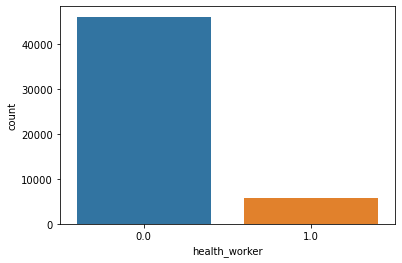

In [125]:
sns.countplot(x="health_worker", data=dfc)

In [126]:
perc_health_worker = dfc[dfc['health_worker']==1]['health_worker'].count()/(dfc[dfc['health_worker']==0]['health_worker'].count()+dfc[dfc['health_worker']==1]['health_worker'].count()) *100
perc_NO_health_worker = 100-perc_health_worker

print('percentage not health worker: ', perc_NO_health_worker)
print('percentage health worker: ', perc_health_worker)

percentage not health worker:  88.82906873528617
percentage health worker:  11.170931264713827


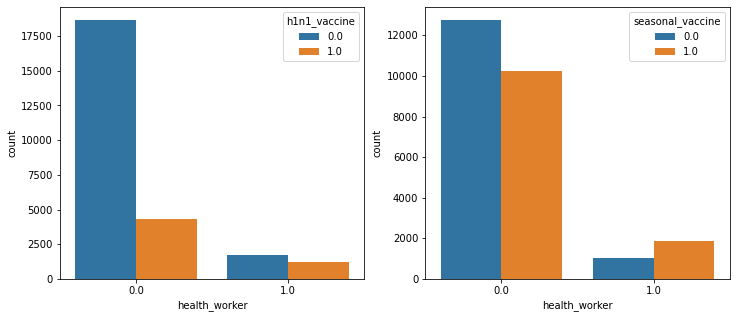

In [127]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="health_worker", hue="h1n1_vaccine", data=dfc, ax=ax1)
sns.countplot(x="health_worker", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.show()

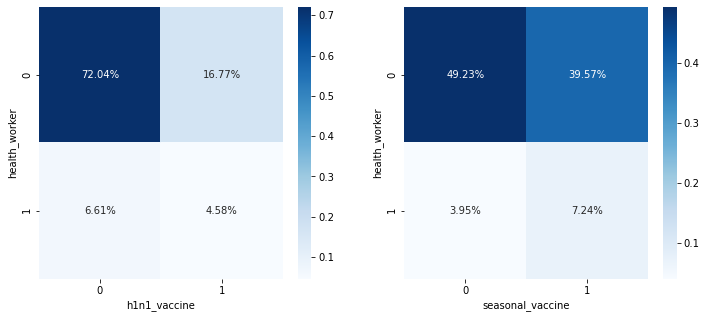

In [128]:
createTwoMatrix(dfc, "health_worker", "h1n1_vaccine", "seasonal_vaccine")

In [129]:
dfc['health_worker_1'] = dfc.apply(lambda row: 1 if row.health_worker == 1 else 0, axis =  1)

#### Model health_worker

In [130]:
health_worker = dfc[numerical]

health_worker_test = health_worker[health_worker['health_worker'].isna()]
health_worker_train = health_worker[health_worker['health_worker'].notna()]

health_worker_test = health_worker_test.drop(columns=["health_worker"])

# Drop rows with NA values
health_worker_train = health_worker_train.dropna()
health_worker_test = health_worker_test.dropna()

# Prep data for model
x1 = health_worker_train.drop(columns=["health_worker"]).values
y1 = health_worker_train["health_worker"].values
x2 = health_worker_test.values

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

# Build model and fit it
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict_proba(x_test)
pred = model.predict(x_test)

print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))

accuracy: 0.8879904162923031
f1: 0.8394969257230664


In [131]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred), 'predictions': list(predictions)}, columns=['y_test', 'pred', 'predictions'])

dataset['1'] = 0

print("accuracy:", accuracy_score(y_test, dataset['1']))
print("f1:", f1_score(y_test, dataset['1'], average='weighted'))

accuracy: 0.8870919436957173
f1: 0.8340156601259211


In [132]:
model.fit(x1, y1)

toImpute = model.predict(x2)


# Add toImpute list as 'Imp_health_worker' column to med_condition_test dataframe
health_worker_test['Imp_health_worker'] = toImpute

health_worker_test = health_worker_test[['Imp_health_worker']]

##### Create Imp_health_worker column

In [133]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, health_worker_test], axis=1)

# Fill NA values in Imp_doctor_recc_h1n1 with values, if no value impute 0
dfc['Imp_health_worker'] = dfc.apply(lambda row: row.Imp_health_worker if row.Imp_health_worker == row.Imp_health_worker else
                                        (row.health_worker if row.health_worker == row.health_worker else 0), axis = 1)

# Add the new column to the numerical list
numerical.append('Imp_health_worker')
numerical.append("health_worker_1")

In [134]:
numerical.remove("health_worker")

Options:
1. Imp_health_worker

In [135]:
dfc[numerical].isna().sum().sort_values(ascending=False)

opinion_seas_sick_from_vacc    1058
opinion_seas_risk              1013
opinion_seas_vacc_effective     914
opinion_h1n1_vacc_effective     789
opinion_h1n1_sick_from_vacc     770
opinion_h1n1_risk               768
household_children              474
household_adults                474
behavioral_avoidance            421
behavioral_touch_face           256
h1n1_knowledge                  238
h1n1_concern                    177
behavioral_outside_home         164
behavioral_large_gatherings     159
behavioral_antiviral_meds       150
behavioral_wash_hands            82
behavioral_face_mask             38
Imp_health_insurance              0
health_insurance_1                0
Imp_doctor_recc_h1n1              0
doctor_recc_h1n1_1                0
Imp_doctor_recc_seasonal          0
doctor_rec_seas_1                 0
Imp_chronic_med_condition         0
chronic_med_condition_1           0
child_under_6M                    0
Imp_health_worker                 0
health_worker_1             

### opinion_seas_sick_from_vacc     
##### Respondent's worry of getting sick from taking seasonal flu vaccine. 1=  not worried, 5= very worried

<AxesSubplot:xlabel='opinion_seas_sick_from_vacc', ylabel='count'>

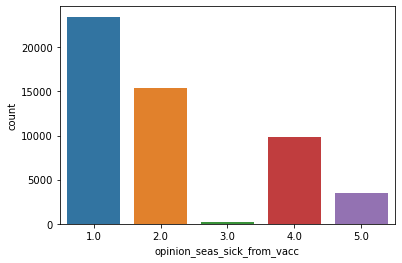

In [136]:
sns.countplot(x="opinion_seas_sick_from_vacc", data=dfc)

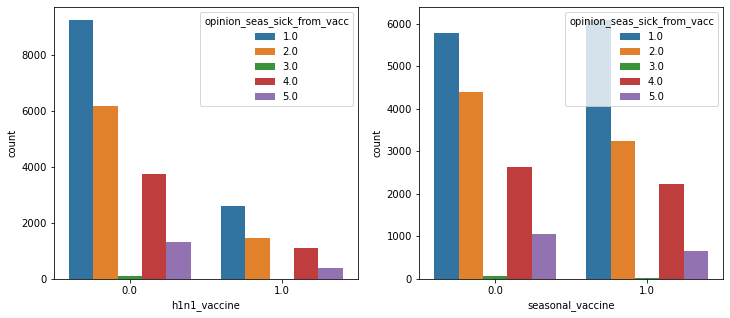

In [137]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="h1n1_vaccine", hue="opinion_seas_sick_from_vacc", data=dfc, ax=ax1)
sns.countplot(x="seasonal_vaccine", hue="opinion_seas_sick_from_vacc", data=dfc, ax=ax2)
plt.show()

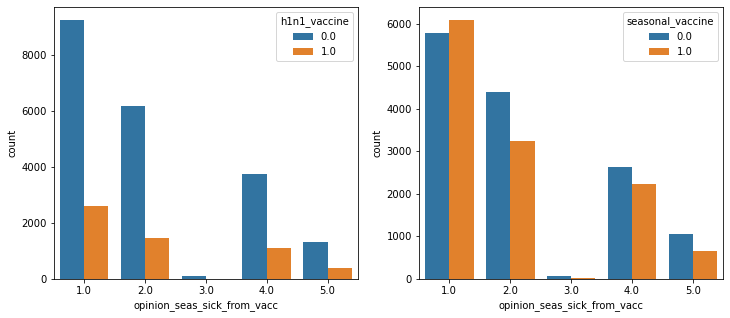

In [138]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="opinion_seas_sick_from_vacc", hue="h1n1_vaccine", data=dfc, ax=ax1)
sns.countplot(x="opinion_seas_sick_from_vacc", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.show()

#### Model opinion_seas_sick_from_vacc

In [139]:
opinion_sick_seas = dfc[numerical]

opinion_sick_seas_test = opinion_sick_seas[opinion_sick_seas['opinion_seas_sick_from_vacc'].isna()]
opinion_sick_seas_train = opinion_sick_seas[opinion_sick_seas['opinion_seas_sick_from_vacc'].notna()]

opinion_sick_seas_test = opinion_sick_seas_test.drop(columns=["opinion_seas_sick_from_vacc"])

# Drop rows with NA values
opinion_sick_seas_train = opinion_sick_seas_train.dropna()
opinion_sick_seas_test = opinion_sick_seas_test.dropna()

# Prep data for model
x1 = opinion_sick_seas_train.drop(columns=["opinion_seas_sick_from_vacc"]).values
y1 = opinion_sick_seas_train["opinion_seas_sick_from_vacc"].values
x2 = opinion_sick_seas_test.values

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

# Build model and fit it
forest = RandomForestClassifier(n_estimators = 150, max_depth=10, random_state=4)
forest.fit(x_train, y_train)

# Make predictions
pred = forest.predict(x_test)

print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))

accuracy: 0.5685148514851485
f1: 0.5575080713777119


In [140]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred)}, columns=['y_test', 'pred'])

dataset['1'] = 1

print("accuracy:", accuracy_score(y_test, dataset['1']))
print("f1:", f1_score(y_test, dataset['1'], average='weighted'))

accuracy: 0.4531683168316832
f1: 0.2826396928716514


In [141]:
forest.fit(x1, y1)
pred = forest.predict(x2)

In [142]:
opinion_sick_seas_test['Imp_opinion_seas_sick_from_vacc'] = pred

opinion_sick_seas_test = opinion_sick_seas_test[['Imp_opinion_seas_sick_from_vacc']]

#### Create Imp_opinion_seas_sick_from_vacc column

In [143]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, opinion_sick_seas_test], axis=1)

# Fill NA values in Imp_doctor_recc_h1n1 with values, if no value impute 0
dfc['Imp_opinion_seas_sick_from_vacc'] = dfc.apply(lambda row: row.Imp_opinion_seas_sick_from_vacc if row.Imp_opinion_seas_sick_from_vacc == row.Imp_opinion_seas_sick_from_vacc else
                                        (row.opinion_seas_sick_from_vacc if row.opinion_seas_sick_from_vacc == row.opinion_seas_sick_from_vacc else 1), axis = 1)

# Add the new column to the numerical list
numerical.append('Imp_opinion_seas_sick_from_vacc')

In [144]:
numerical.remove('opinion_seas_sick_from_vacc')

Options:
1. Imp_opinion_seas_sick_from_vacc

In [145]:
dfc[numerical].isna().sum().sort_values(ascending=False)

opinion_seas_risk                  1013
opinion_seas_vacc_effective         914
opinion_h1n1_vacc_effective         789
opinion_h1n1_sick_from_vacc         770
opinion_h1n1_risk                   768
household_adults                    474
household_children                  474
behavioral_avoidance                421
behavioral_touch_face               256
h1n1_knowledge                      238
h1n1_concern                        177
behavioral_outside_home             164
behavioral_large_gatherings         159
behavioral_antiviral_meds           150
behavioral_wash_hands                82
behavioral_face_mask                 38
Imp_chronic_med_condition             0
health_worker_1                       0
Imp_health_worker                     0
child_under_6M                        0
chronic_med_condition_1               0
doctor_recc_h1n1_1                    0
doctor_rec_seas_1                     0
Imp_doctor_recc_seasonal              0
Imp_doctor_recc_h1n1                  0


In [146]:
dfc.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,nan_doctor_rec_seas,doctor_rec_seas_1,Imp_doctor_recc_seasonal,nan_chronic_med_condition,chronic_med_condition_1,Imp_chronic_med_condition,child_under_6M,health_worker_1,Imp_health_worker,Imp_opinion_seas_sick_from_vacc
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0.0,0,0,0.0,0,0,0.0,2.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0.0,0,0,0.0,0,0,0.0,4.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1,0,0.0,0,1,1.0,0,0,0.0,2.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,1.0,0,1,1.0,0,0,0.0,1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0.0,0,0,0.0,0,0,0.0,4.0


### opinion_seas_risk                   
##### Respondent's opinion about risk of getting sick with seasonal flu without vaccine. 1= very low, 5= very high

<AxesSubplot:xlabel='opinion_seas_risk', ylabel='count'>

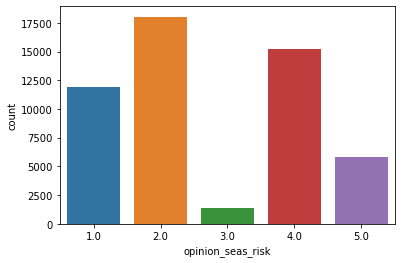

In [147]:
sns.countplot(x="opinion_seas_risk", data=dfc)

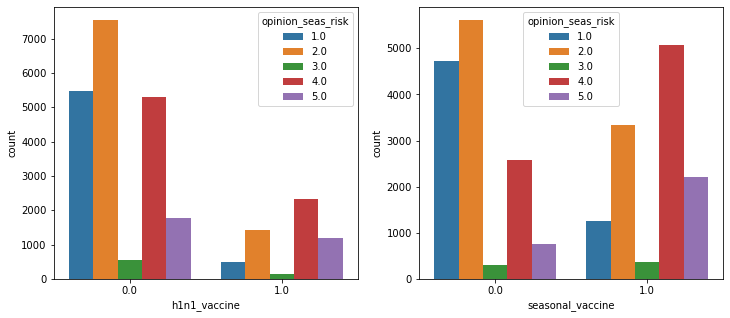

In [148]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x="h1n1_vaccine", hue="opinion_seas_risk", data=dfc, ax=ax1)
sns.countplot(x="seasonal_vaccine", hue="opinion_seas_risk", data=dfc, ax=ax2)
plt.show()

#### Model opinion_seas_risk

In [149]:
opinion_seas_risk = dfc[numerical]

opinion_seas_risk_test = opinion_seas_risk[opinion_seas_risk['opinion_seas_risk'].isna()]
opinion_seas_risk_train = opinion_seas_risk[opinion_seas_risk['opinion_seas_risk'].notna()]

opinion_seas_risk_test = opinion_seas_risk_test.drop(columns=["opinion_seas_risk"])

# Drop rows with NA values
opinion_seas_risk_train = opinion_seas_risk_train.dropna()
opinion_seas_risk_test = opinion_seas_risk_test.dropna()

# Prep data for model
x1 = opinion_seas_risk_train.drop(columns=["opinion_seas_risk"]).values
y1 = opinion_seas_risk_train["opinion_seas_risk"].values
x2 = opinion_seas_risk_test.values

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

# Build model and fit it
forest = RandomForestClassifier(n_estimators = 150, max_depth=4, random_state=4)
forest.fit(x_train, y_train)

# Make predictions
pred = forest.predict(x_test)

print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))

accuracy: 0.5247652001977261
f1: 0.4979638975573202


In [150]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred)}, columns=['y_test', 'pred'])

dataset['1'] = 2

print("accuracy:", accuracy_score(y_test, dataset['1']))
print("f1:", f1_score(y_test, dataset['1'], average='weighted'))

accuracy: 0.33821057834898666
f1: 0.17095425362468727


In [151]:
forest.fit(x1, y1)
pred = forest.predict(x2)

In [152]:
pred

array([2., 2., 2., 4., 4., 2., 4., 2., 1., 2., 4., 1., 1., 2., 4., 2., 2.,
       2., 2., 4., 1., 2., 1., 2., 1., 2., 2., 1., 4., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 4., 4., 4., 1., 2., 2., 4., 2., 2., 1., 4., 4., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 4., 1., 1., 4., 4., 2., 1., 1.,
       2., 2., 2., 4., 2., 2., 2., 2., 2., 4., 4., 2., 1., 2., 2., 4., 4.,
       2., 1., 2., 1., 2., 1., 1., 2., 4., 2., 2., 2., 2., 1., 2., 1., 2.,
       1.])

In [153]:
opinion_seas_risk_test['Imp_opinion_seas_risk'] = pred

opinion_seas_risk_test = opinion_seas_risk_test[['Imp_opinion_seas_risk']]

#### Create Imp_opinion_seas_risk column

In [154]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, opinion_seas_risk_test], axis=1)

# Fill NA values in Imp_doctor_recc_h1n1 with values, if no value impute 0
dfc['Imp_opinion_seas_risk'] = dfc.apply(lambda row: row.Imp_opinion_seas_risk if row.Imp_opinion_seas_risk == row.Imp_opinion_seas_risk else
                                        (row.opinion_seas_risk if row.opinion_seas_risk == row.opinion_seas_risk else 2), axis = 1)

# Add the new column to the numerical list
numerical.append('Imp_opinion_seas_risk')

numerical.remove('opinion_seas_risk')

Options:
1. Imp_opinion_seas_risk

In [155]:
dfc.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,doctor_rec_seas_1,Imp_doctor_recc_seasonal,nan_chronic_med_condition,chronic_med_condition_1,Imp_chronic_med_condition,child_under_6M,health_worker_1,Imp_health_worker,Imp_opinion_seas_sick_from_vacc,Imp_opinion_seas_risk
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0.0,0,0,0.0,0,0,0.0,2.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0.0,0,0,0.0,0,0,0.0,4.0,2.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0.0,0,1,1.0,0,0,0.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,1.0,0,1,1.0,0,0,0.0,1.0,4.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0.0,0,0,0.0,0,0,0.0,4.0,1.0


In [156]:
dfc[numerical].isna().sum().sort_values(ascending=False)

opinion_seas_vacc_effective        914
opinion_h1n1_vacc_effective        789
opinion_h1n1_sick_from_vacc        770
opinion_h1n1_risk                  768
household_children                 474
household_adults                   474
behavioral_avoidance               421
behavioral_touch_face              256
h1n1_knowledge                     238
h1n1_concern                       177
behavioral_outside_home            164
behavioral_large_gatherings        159
behavioral_antiviral_meds          150
behavioral_wash_hands               82
behavioral_face_mask                38
Imp_chronic_med_condition            0
Imp_opinion_seas_sick_from_vacc      0
health_worker_1                      0
Imp_health_worker                    0
child_under_6M                       0
chronic_med_condition_1              0
Imp_doctor_recc_seasonal             0
doctor_rec_seas_1                    0
doctor_recc_h1n1_1                   0
Imp_doctor_recc_h1n1                 0
health_insurance_1       

### all other numerical columns with NAN values      

In [157]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [158]:
dfc_nan = dfc[numerical]
listOfColumns = dfc_nan.columns.to_list()

In [159]:
listOfColumns

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'household_adults',
 'household_children',
 'Imp_health_insurance',
 'health_insurance_1',
 'Imp_doctor_recc_h1n1',
 'doctor_recc_h1n1_1',
 'Imp_doctor_recc_seasonal',
 'doctor_rec_seas_1',
 'Imp_chronic_med_condition',
 'chronic_med_condition_1',
 'child_under_6M',
 'Imp_health_worker',
 'health_worker_1',
 'Imp_opinion_seas_sick_from_vacc',
 'Imp_opinion_seas_risk']

In [160]:
listOfColumns.remove('Imp_opinion_seas_risk')
listOfColumns.remove('Imp_opinion_seas_sick_from_vacc')
listOfColumns.remove('health_worker_1')
listOfColumns.remove('Imp_health_worker')
listOfColumns.remove('child_under_6M')
listOfColumns.remove('chronic_med_condition_1')
listOfColumns.remove('Imp_chronic_med_condition')
listOfColumns.remove('doctor_rec_seas_1')
listOfColumns.remove('Imp_doctor_recc_seasonal')
listOfColumns.remove('doctor_recc_h1n1_1')
listOfColumns.remove('health_insurance_1')
listOfColumns.remove('Imp_health_insurance')
listOfColumns.remove('Imp_doctor_recc_h1n1')

In [161]:
listOfColumns

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'household_adults',
 'household_children']

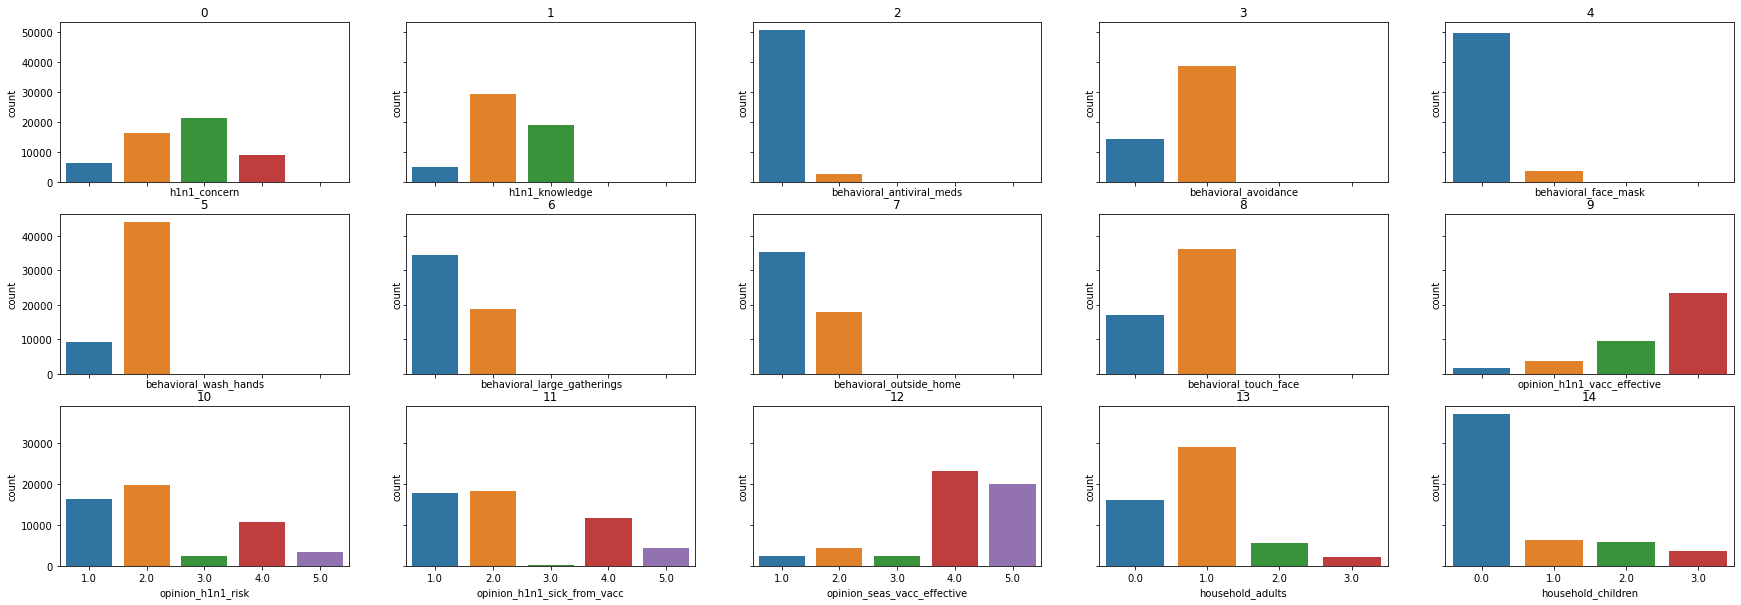

In [162]:
fig, ax = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(30,10))

currentNum = 0

for i in range(3):
    for j in range(5):
        ax[i, j].set_title(currentNum)
        sns.countplot(x=listOfColumns[currentNum], data=dfc, ax=ax[i,j])
        currentNum +=1

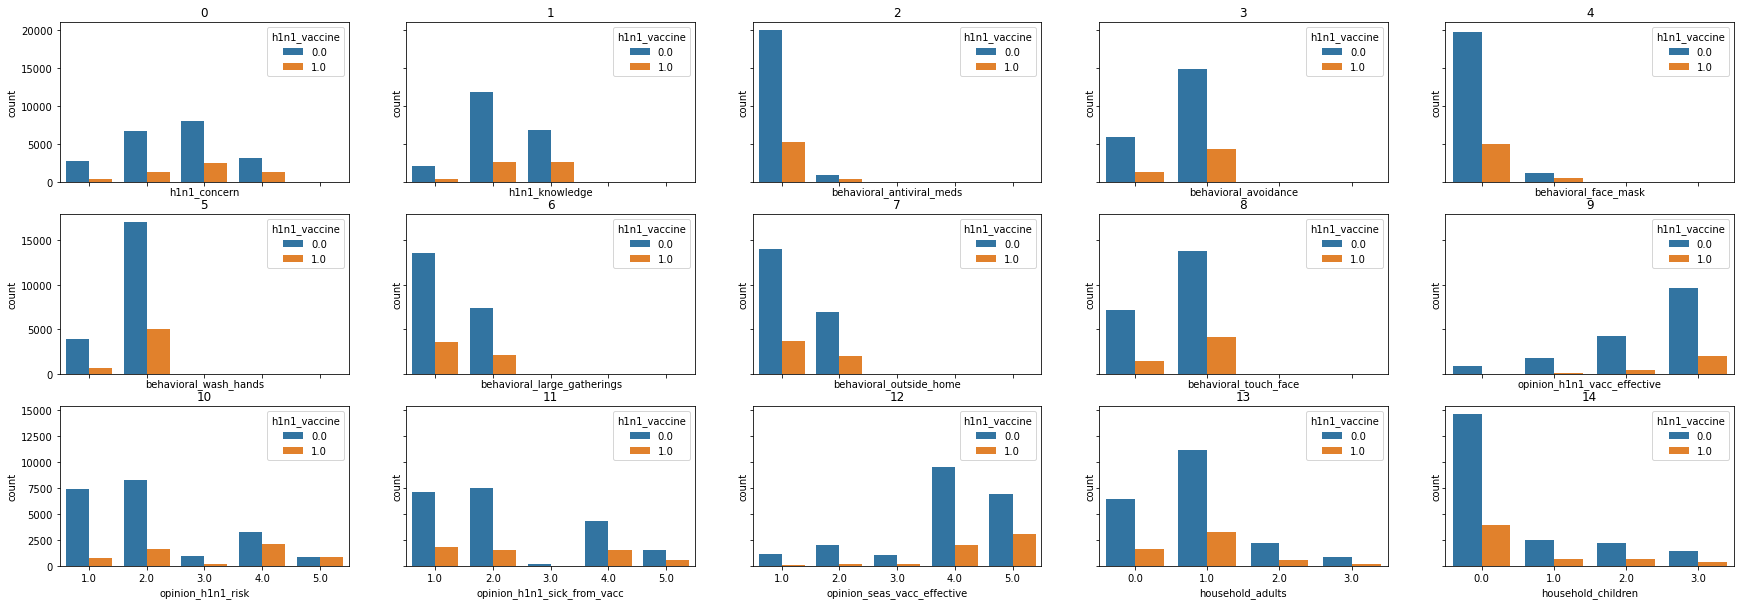

In [163]:
fig, ax = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(30,10))

currentNum = 0

for i in range(3):
    for j in range(5):
        ax[i, j].set_title(currentNum)
        sns.countplot(x=listOfColumns[currentNum], data=dfc, hue="h1n1_vaccine", ax=ax[i,j])
        currentNum +=1

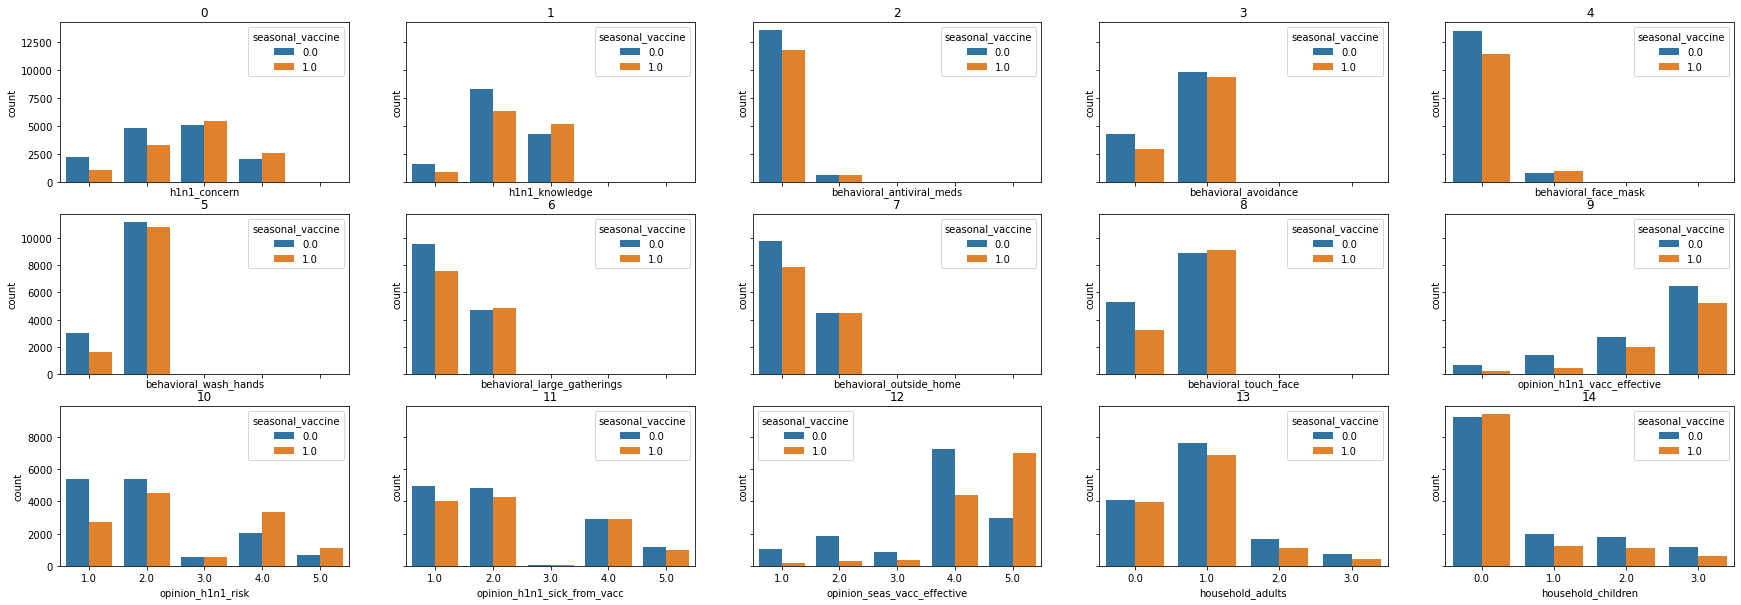

In [164]:
fig, ax = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(30,10))

currentNum = 0

for i in range(3):
    for j in range(5):
        ax[i, j].set_title(currentNum)
        sns.countplot(x=listOfColumns[currentNum], data=dfc, hue="seasonal_vaccine", ax=ax[i,j])
        currentNum +=1

In [165]:
IterativeImputer(random_state=0)

IterativeImputer(random_state=0)

In [166]:
imp.fit(dfc_nan)

IterativeImputer(random_state=0)

In [167]:
dfc_nan_array = imp.transform(dfc_nan)

In [168]:
dfc_imputed = pd.DataFrame(dfc_nan_array, columns=dfc_nan.columns.to_list())

In [169]:
dfc_imputed = dfc_imputed[listOfColumns]

In [170]:
for column in listOfColumns:
    newCol = 'Imp_'+column
    dfc_imputed = dfc_imputed.rename(columns={column: newCol})

In [171]:
dfc_imputed.head()

,Imp_h1n1_concern,Imp_h1n1_knowledge,Imp_behavioral_antiviral_meds,Imp_behavioral_avoidance,Imp_behavioral_face_mask,Imp_behavioral_wash_hands,Imp_behavioral_large_gatherings,Imp_behavioral_outside_home,Imp_behavioral_touch_face,Imp_opinion_h1n1_vacc_effective,Imp_opinion_h1n1_risk,Imp_opinion_h1n1_sick_from_vacc,Imp_opinion_seas_vacc_effective,Imp_household_adults,Imp_household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,4.0,4.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,4.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,0.0


In [172]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, dfc_imputed], axis=1)

# Add the new column to the numerical list
numerical = numerical + dfc_imputed.columns.to_list()

In [173]:
numerical

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'household_adults',
 'household_children',
 'Imp_health_insurance',
 'health_insurance_1',
 'Imp_doctor_recc_h1n1',
 'doctor_recc_h1n1_1',
 'Imp_doctor_recc_seasonal',
 'doctor_rec_seas_1',
 'Imp_chronic_med_condition',
 'chronic_med_condition_1',
 'child_under_6M',
 'Imp_health_worker',
 'health_worker_1',
 'Imp_opinion_seas_sick_from_vacc',
 'Imp_opinion_seas_risk',
 'Imp_h1n1_concern',
 'Imp_h1n1_knowledge',
 'Imp_behavioral_antiviral_meds',
 'Imp_behavioral_avoidance',
 'Imp_behavioral_face_mask',
 'Imp_behavioral_wash_hands',
 'Imp_behavioral_large_gatherings',
 'Imp_behavioral_outside_home',
 'Imp_behavioral_touch_face',
 'Imp_opinion_h1n1

In [174]:
for x in listOfColumns:
    numerical.remove(x)

<AxesSubplot:>

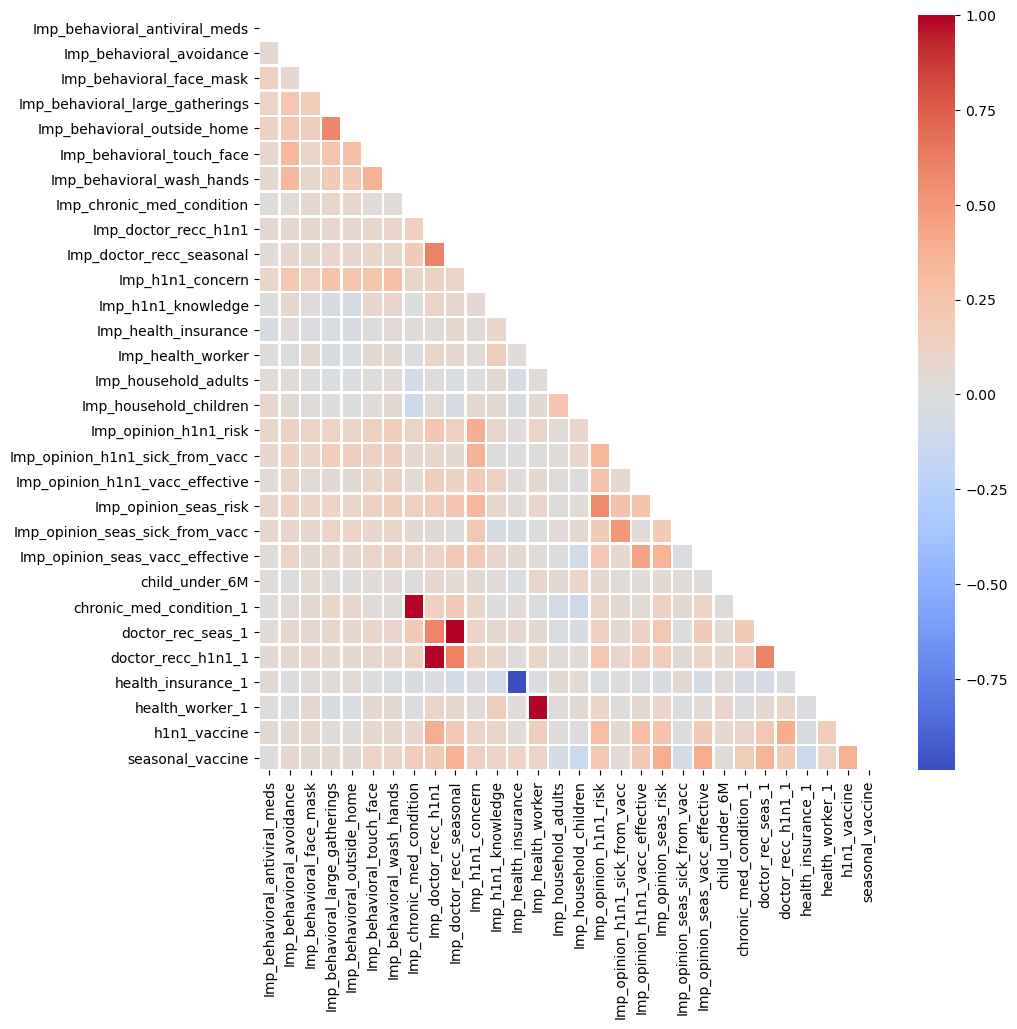

In [175]:
numerical_correlation = sorted(numerical) + dependent
correlation = dfc[numerical_correlation].corr(method="spearman")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(10,10), dpi=100, facecolor = 'w', edgecolor="k")
sns.heatmap(correlation, mask=mask, cmap= "coolwarm", center=0, linewidths=1, fmt=".2f")

### Categorical

In [176]:
dfc[categorical].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


In [177]:
dfc[categorical].isna().sum().sort_values(ascending=False)

employment_occupation    26896
employment_industry      26605
income_poverty            8920
rent_or_own               4078
employment_status         2934
marital_status            2850
education                 2814
age_group                    0
race                         0
sex                          0
hhs_geo_region               0
census_msa                   0
dtype: int64

### Employment_occupation

In [178]:
dfc.groupby(['employment_occupation'])['sex'].count()

employment_occupation
bxpfxfdn     662
ccgxvspp     709
cmhcxjea    2471
dcjcmpih     309
dlvbwzss     472
emcorrxb    2554
haliazsg     596
hfxkjkmi    1491
hodpvpew     461
kldqjyjy     915
mxkfnird    3070
oijqvulv     690
pvmttkik     206
qxajmpny    1047
rcertsgn     573
tfqavkke     790
ukymxvdu     701
uqqtjvyb     953
vlluhbov     679
xgwztkwe    2220
xqwwgdyp     960
xtkaffoo    3526
xzmlyyjv     464
Name: sex, dtype: int64

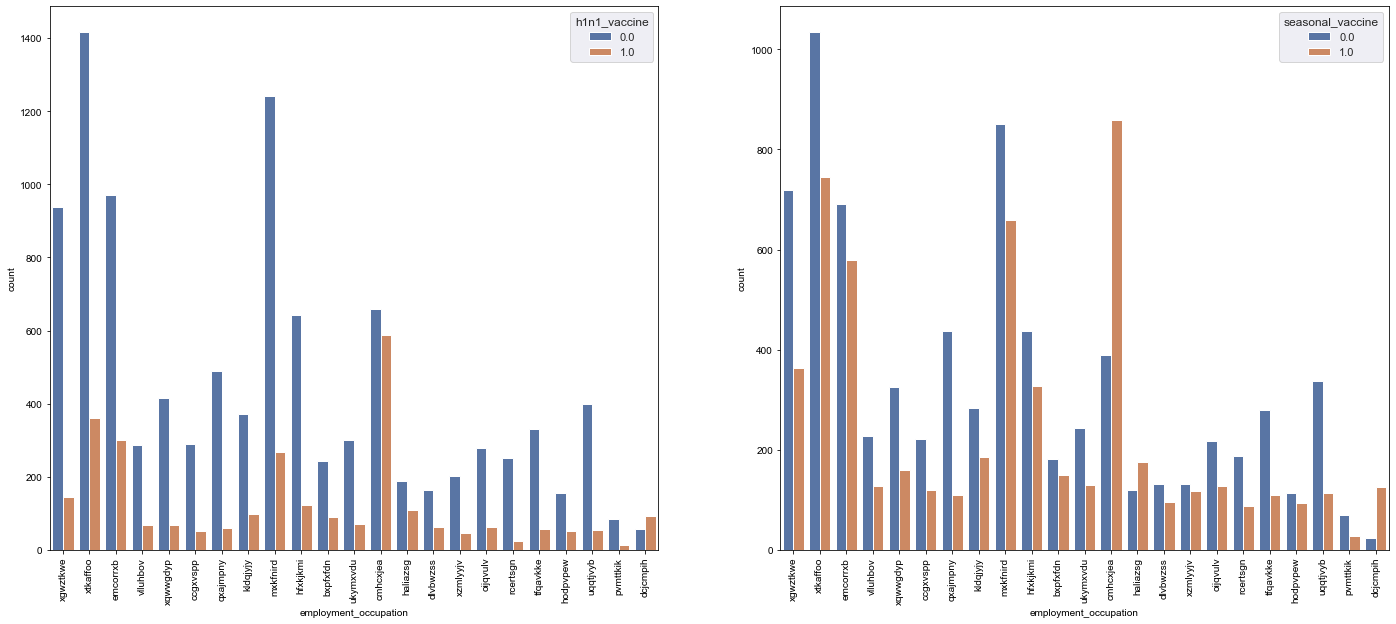

In [179]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,10))

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.countplot(x="employment_occupation", hue="h1n1_vaccine", data=dfc, ax=ax1)
plt.setp(plot.get_xticklabels(), rotation=90)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="employment_occupation", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.xticks(rotation=90);

plt.show()

In [180]:
empl_occ = dfc[["employment_occupation","seasonal_vaccine","h1n1_vaccine"]]

In [181]:
df_empl_occ = pd.get_dummies(empl_occ[['employment_occupation']], prefix='OHE_')

In [182]:
empl_occ = pd.concat([empl_occ,df_empl_occ],axis=1)

In [183]:
empl_occ['occ_no_value'] = empl_occ.apply(lambda row: 1 if row.employment_occupation != row.employment_occupation else 0, axis=1)

In [184]:
empl_occ = empl_occ.drop(columns=["employment_occupation"])

In [185]:
empl_occ.head()

,seasonal_vaccine,h1n1_vaccine,OHE__bxpfxfdn,OHE__ccgxvspp,OHE__cmhcxjea,OHE__dcjcmpih,OHE__dlvbwzss,OHE__emcorrxb,OHE__haliazsg,OHE__hfxkjkmi,...,OHE__rcertsgn,OHE__tfqavkke,OHE__ukymxvdu,OHE__uqqtjvyb,OHE__vlluhbov,OHE__xgwztkwe,OHE__xqwwgdyp,OHE__xtkaffoo,OHE__xzmlyyjv,occ_no_value
0,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


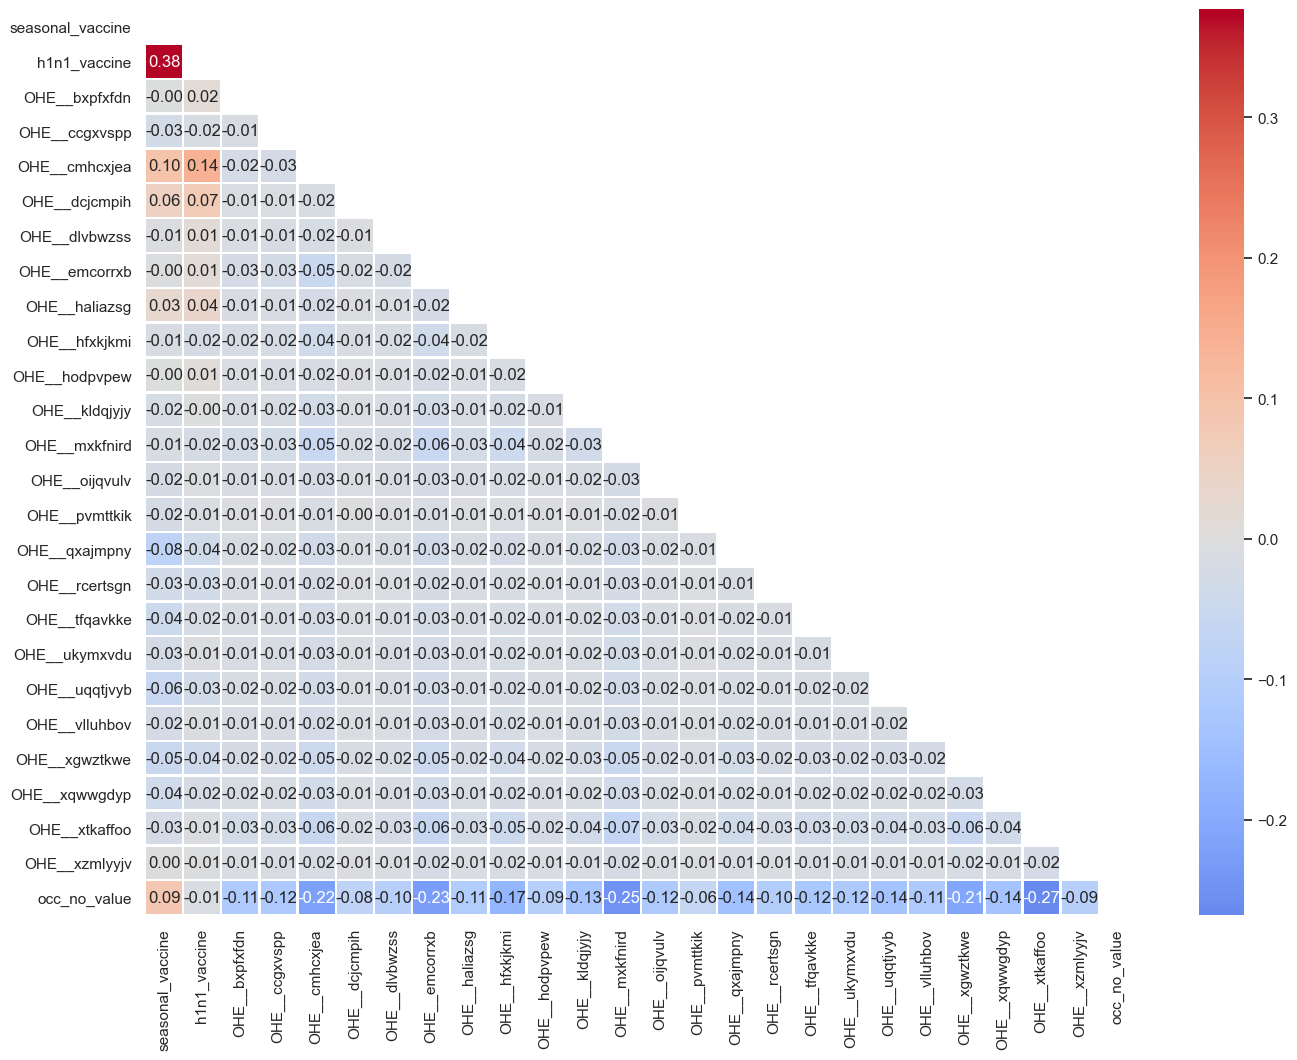

In [186]:
sns.set_theme(style="white")
sns.set_style("white")

empl_correlation = empl_occ.columns.to_list()
correlation = empl_occ[empl_correlation].corr(method="spearman")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(16,12), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=True, center=0, linewidths=1, fmt=".2f")

In [187]:
empl_occ['occ_pos_vacc'] = empl_occ.apply(lambda row: 1 if row.OHE__cmhcxjea == 1 else
                                         (1 if row.OHE__dcjcmpih == 1 else 
                                          (1 if row.OHE__haliazsg else 0)), axis=1)

In [188]:
empl_occ['occ_pos_seas'] = empl_occ.apply(lambda row: 1 if row.OHE__cmhcxjea == 1 else
                                         (1 if row.OHE__dcjcmpih == 1 else 
                                          (1 if row.OHE__haliazsg else
                                           (1 if row.occ_no_value else 0))), axis=1)

In [189]:
empl_occ = empl_occ[['occ_pos_vacc', 'occ_pos_seas']]

In [190]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, empl_occ], axis=1)

In [191]:
dfc.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Imp_behavioral_outside_home,Imp_behavioral_touch_face,Imp_opinion_h1n1_vacc_effective,Imp_opinion_h1n1_risk,Imp_opinion_h1n1_sick_from_vacc,Imp_opinion_seas_vacc_effective,Imp_household_adults,Imp_household_children,occ_pos_vacc,occ_pos_seas
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,3.0,1.0,2.0,2.0,0.0,0.0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,5.0,4.0,4.0,4.0,0.0,0.0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,3.0,1.0,1.0,4.0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,5.0,5.0,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,3.0,3.0,2.0,3.0,1.0,0.0,0,0


In [192]:
numerical.append('occ_pos_vacc')
numerical.append('occ_pos_seas')

In [193]:
categorical.remove("employment_occupation")

Options:
1. use occ_pos_vacc OR use occ_pos_seas for seasonal and occ_pos_vacc for h1n1
2. drop, there are a lot of nan values

In [194]:
dfc[categorical].isna().sum().sort_values(ascending=False)

employment_industry    26605
income_poverty          8920
rent_or_own             4078
employment_status       2934
marital_status          2850
education               2814
age_group                  0
race                       0
sex                        0
hhs_geo_region             0
census_msa                 0
dtype: int64

### employment_industry

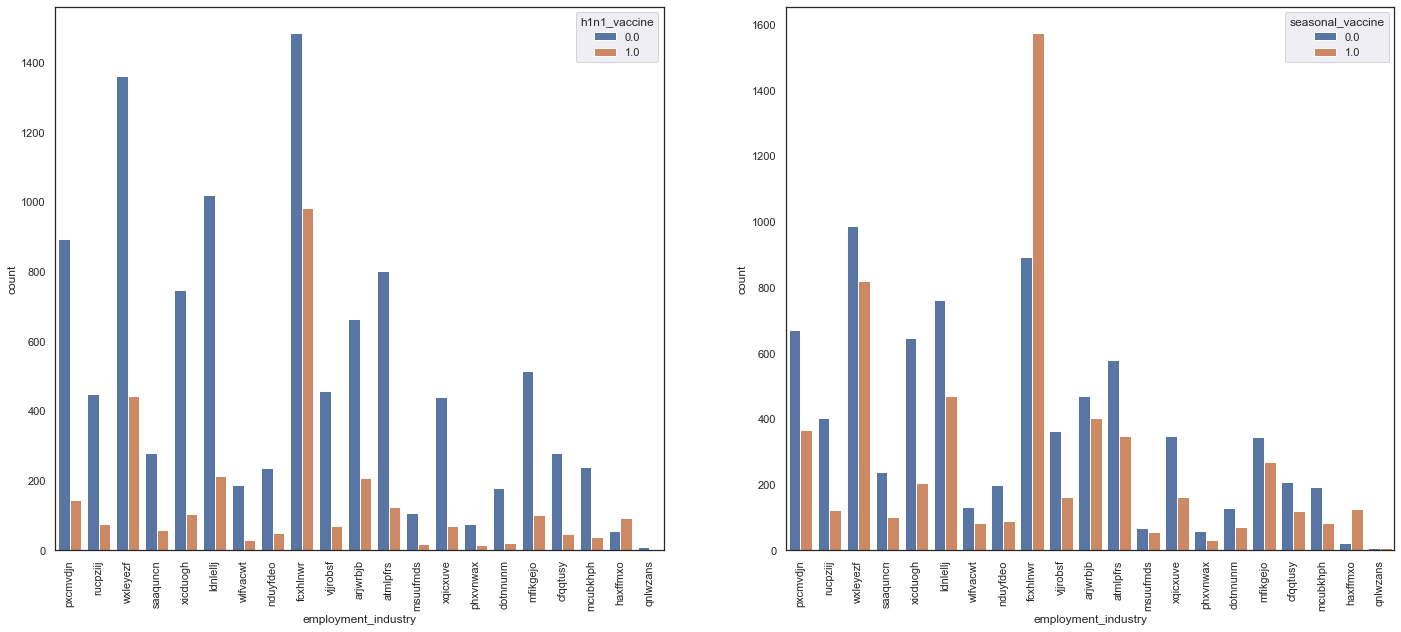

In [195]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,10))

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.countplot(x="employment_industry", hue="h1n1_vaccine", data=dfc, ax=ax1)
plt.setp(plot.get_xticklabels(), rotation=90)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="employment_industry", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.xticks(rotation=90);

plt.show()

In [196]:
# Create new dataframe with industry and both vaccines
empl_ind = dfc[["employment_industry","seasonal_vaccine","h1n1_vaccine"]]

# Create new dataframe with one hot encoded columns
df_empl_ind = pd.get_dummies(empl_ind[['employment_industry']],prefix='OHE_')

# Merge the two dataframes
empl_ind = pd.concat([empl_ind,df_empl_ind],axis=1)

# Add a column to indicate a value was missing and is imputed (later on)
empl_ind['ind_no_value'] = empl_ind.apply(lambda row: 1 if row.employment_industry != row.employment_industry else 0, axis=1)

empl_ind = empl_ind.drop(columns=["employment_industry"])

empl_ind.head()

,seasonal_vaccine,h1n1_vaccine,OHE__arjwrbjb,OHE__atmlpfrs,OHE__cfqqtusy,OHE__dotnnunm,OHE__fcxhlnwr,OHE__haxffmxo,OHE__ldnlellj,OHE__mcubkhph,...,OHE__pxcmvdjn,OHE__qnlwzans,OHE__rucpziij,OHE__saaquncn,OHE__vjjrobsf,OHE__wlfvacwt,OHE__wxleyezf,OHE__xicduogh,OHE__xqicxuve,ind_no_value
0,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


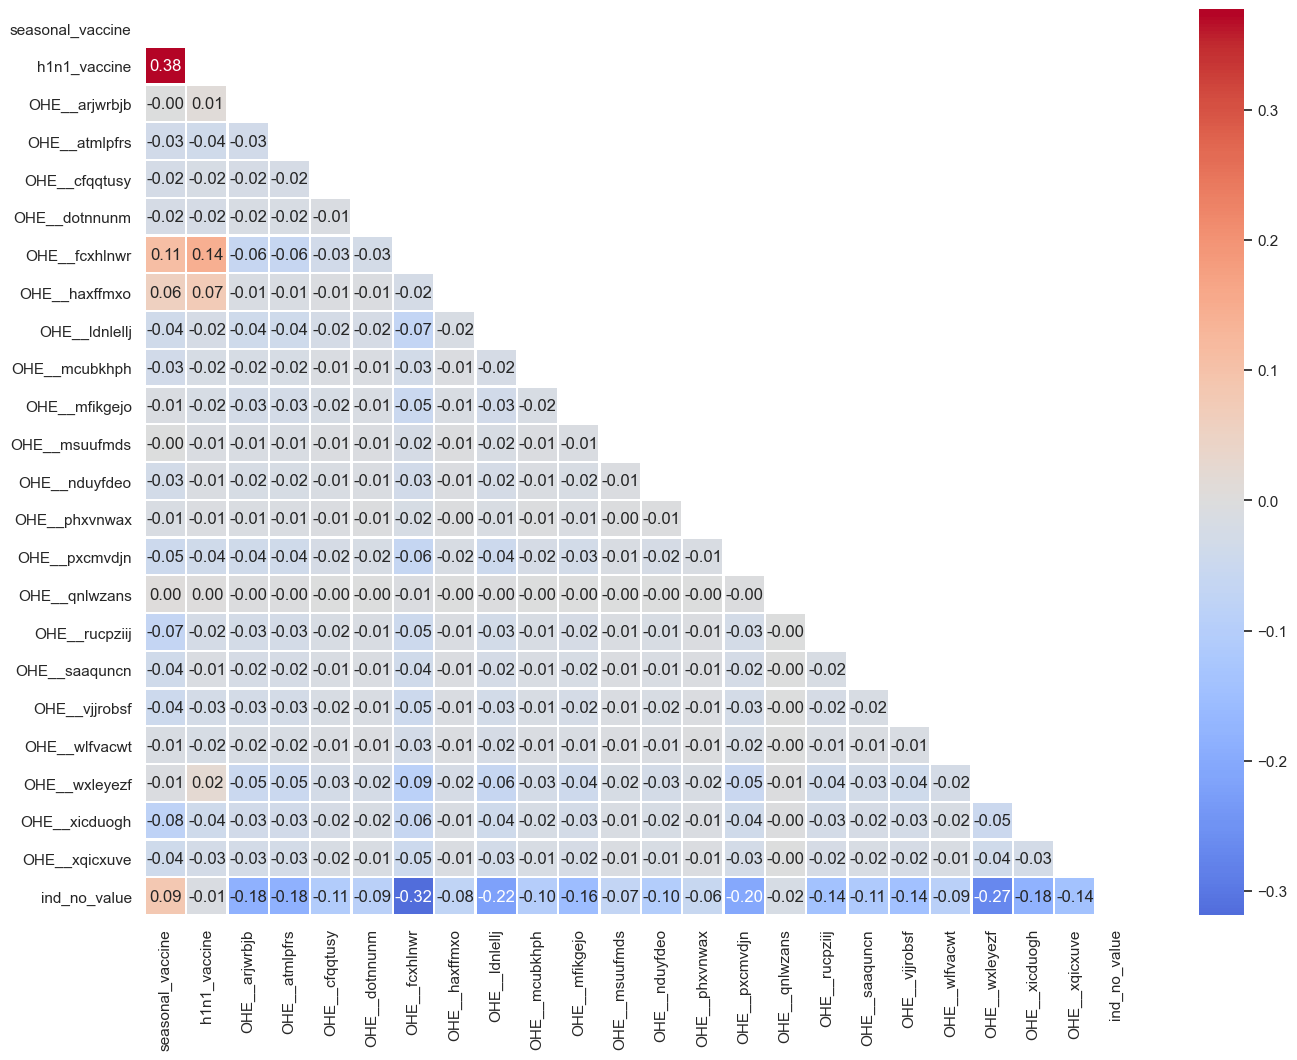

In [197]:
sns.set_theme(style="white")
sns.set_style("white")

ind_correlation = empl_ind.columns.to_list()
correlation = empl_ind[ind_correlation].corr(method="spearman")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(16,12), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=True, center=0, linewidths=1, fmt=".2f")

In [198]:
empl_ind['ind_pos_vacc'] = empl_ind.apply(lambda row: 1 if row.OHE__fcxhlnwr == 1 else
                                         (1 if row.OHE__haxffmxo == 1 else 0), axis=1)

In [199]:
empl_ind['ind_pos_seas'] = empl_ind.apply(lambda row: 1 if row.OHE__fcxhlnwr == 1 else
                                         (1 if row.OHE__haxffmxo == 1 else
                                          (1 if row.ind_no_value == 1 else 0)), axis=1)

In [200]:
empl_ind = empl_ind[['ind_pos_vacc','ind_pos_seas']]

In [201]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, empl_ind], axis=1)

# Add the new column to the numerical list
numerical.append('ind_pos_vacc')
numerical.append('ind_pos_seas')

categorical.remove('employment_industry')

Options: 
1. use ind_pos_vacc OR use ind_pos_seas for seasonal and occ_pos_vacc for h1n1
2. drop, there are a lot of nan values

### Income Poverty

<AxesSubplot:xlabel='income_poverty', ylabel='count'>

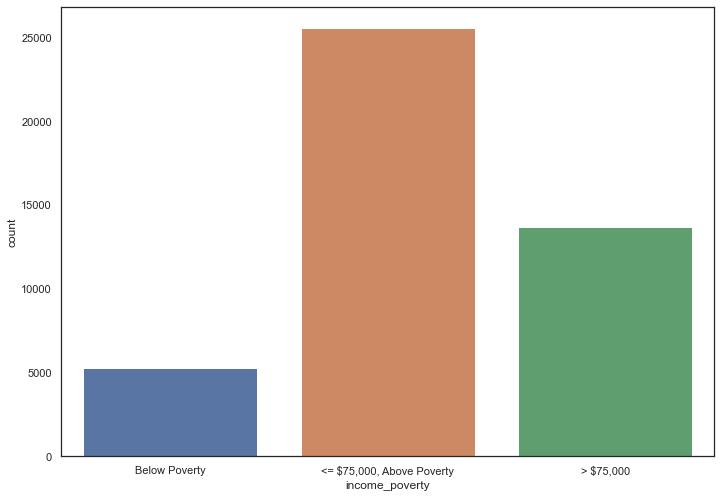

In [202]:
sns.countplot(x="income_poverty", data=dfc)

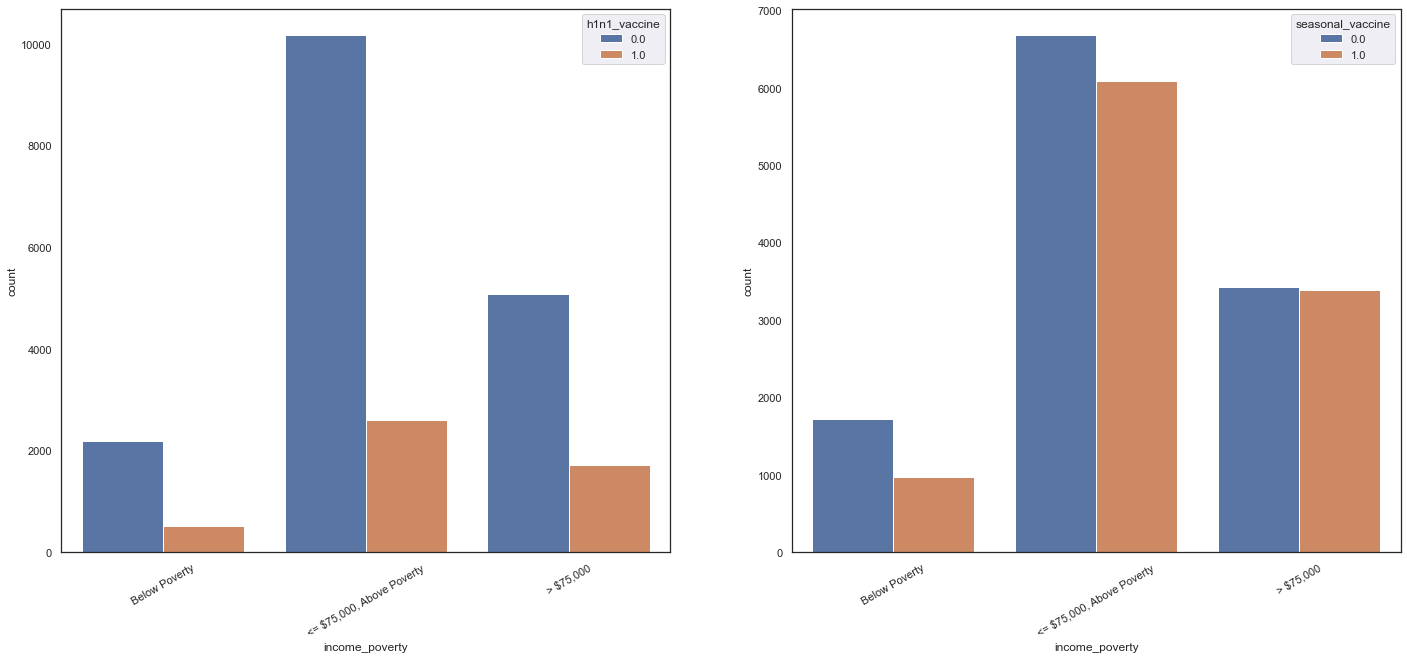

In [203]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,10))

sns.set(rc={'figure.figsize':(8,8)})
plot = sns.countplot(x="income_poverty", hue="h1n1_vaccine", data=dfc, ax=ax1)
plt.setp(plot.get_xticklabels(), rotation=30)

sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="income_poverty", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.xticks(rotation=30);

plt.show()

In [204]:
dfc['income_poverty'] = dfc.apply(lambda row: -1 if row.income_poverty == 'Below Poverty' else
                         (0 if row.income_poverty == '<= $75,000, Above Poverty' else
                         (1 if row.income_poverty == '> $75,000' else np.nan)), axis=1)

In [205]:
dfc[numerical].columns.to_list()

['Imp_health_insurance',
 'health_insurance_1',
 'Imp_doctor_recc_h1n1',
 'doctor_recc_h1n1_1',
 'Imp_doctor_recc_seasonal',
 'doctor_rec_seas_1',
 'Imp_chronic_med_condition',
 'chronic_med_condition_1',
 'child_under_6M',
 'Imp_health_worker',
 'health_worker_1',
 'Imp_opinion_seas_sick_from_vacc',
 'Imp_opinion_seas_risk',
 'Imp_h1n1_concern',
 'Imp_h1n1_knowledge',
 'Imp_behavioral_antiviral_meds',
 'Imp_behavioral_avoidance',
 'Imp_behavioral_face_mask',
 'Imp_behavioral_wash_hands',
 'Imp_behavioral_large_gatherings',
 'Imp_behavioral_outside_home',
 'Imp_behavioral_touch_face',
 'Imp_opinion_h1n1_vacc_effective',
 'Imp_opinion_h1n1_risk',
 'Imp_opinion_h1n1_sick_from_vacc',
 'Imp_opinion_seas_vacc_effective',
 'Imp_household_adults',
 'Imp_household_children',
 'occ_pos_vacc',
 'occ_pos_seas',
 'ind_pos_vacc',
 'ind_pos_seas']

In [206]:
numerical.append('income_poverty')

In [207]:
income = dfc[numerical]

income_test = income[income['income_poverty'].isna()]
income_train = income[income['income_poverty'].notna()]

income_test = income_test.drop(columns=["income_poverty"])

# Drop rows with NA values
income_train = income_train.dropna()
income_test = income_test.dropna()

# Prep data for model
x1 = income_train.drop(columns=["income_poverty"]).values
y1 = income_train["income_poverty"].values
x2 = income_test.values

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

# Build model and fit it
forest = RandomForestClassifier(n_estimators = 150, max_depth=8, random_state=4)
forest.fit(x_train, y_train)

# Make predictions
pred = forest.predict(x_test)

print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))


accuracy: 0.619395437689628
f1: 0.5685707415906179


In [208]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred)}, columns=['y_test', 'pred'])

dataset['1'] = 0

print("accuracy:", accuracy_score(y_test, dataset['1']))
print("f1:", f1_score(y_test, dataset['1'], average='weighted'))

accuracy: 0.5733228452635127
f1: 0.41784060517597915


In [209]:
forest.fit(x1, y1)

predictions = forest.predict(x2)

In [210]:
income_test['Imp_income_poverty'] = predictions

income_test = income_test[['Imp_income_poverty']]

In [211]:
dfc['income_poverty'].head()

0   -1.0
1   -1.0
2    0.0
3   -1.0
4    0.0
Name: income_poverty, dtype: float64

In [212]:
income_test.head()

,Imp_income_poverty
24,0.0
26,1.0
31,0.0
38,0.0
39,0.0


In [213]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, income_test], axis=1)

# Fill NA values in Imp_doctor_recc_h1n1 with values, if no value impute 0
dfc['Imp_income_poverty'] = dfc.apply(lambda row: row.Imp_income_poverty if row.Imp_income_poverty == row.Imp_income_poverty else
                                        (row.income_poverty if row.income_poverty == row.income_poverty else 0), axis = 1)

# Add the new column to the numerical list
numerical.append('Imp_income_poverty')

categorical.remove('income_poverty')

In [214]:
numerical.remove('income_poverty')

Options:
1. Imp_income_poverty

In [215]:
dfc.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Imp_opinion_h1n1_risk,Imp_opinion_h1n1_sick_from_vacc,Imp_opinion_seas_vacc_effective,Imp_household_adults,Imp_household_children,occ_pos_vacc,occ_pos_seas,ind_pos_vacc,ind_pos_seas,Imp_income_poverty
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,0.0,0.0,0,1,0,1,-1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,4.0,4.0,0.0,0.0,0,0,0,0,-1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,1.0,4.0,2.0,0.0,0,0,0,0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,5.0,5.0,0.0,0.0,0,1,0,1,-1.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,2.0,3.0,1.0,0.0,0,0,0,0,0.0


In [216]:
dfc[categorical].isna().sum().sort_values(ascending=False)

rent_or_own          4078
employment_status    2934
marital_status       2850
education            2814
age_group               0
race                    0
sex                     0
hhs_geo_region          0
census_msa              0
dtype: int64

### rent_or_own

<AxesSubplot:xlabel='rent_or_own', ylabel='count'>

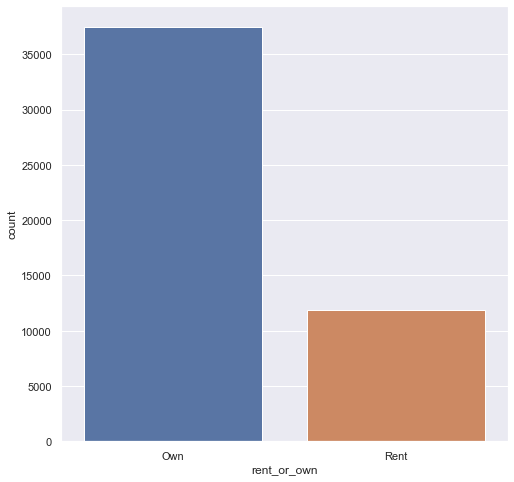

In [217]:
sns.countplot(x="rent_or_own", data=dfc)

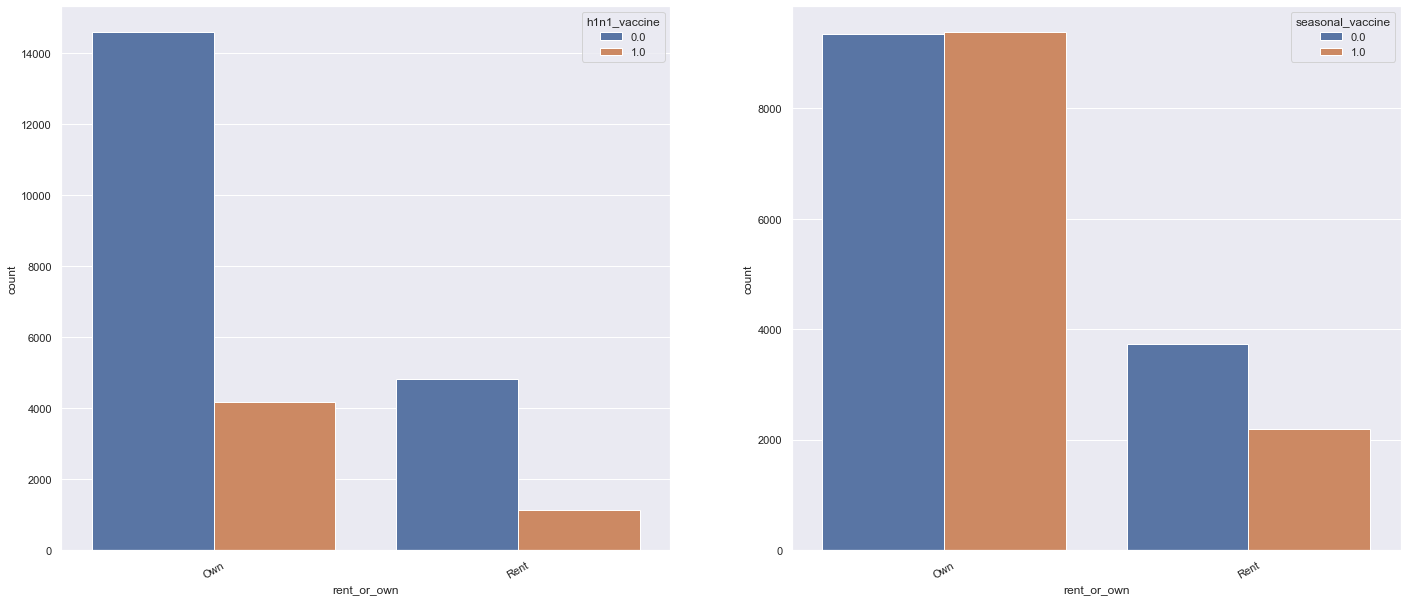

In [218]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,10))

sns.set(rc={'figure.figsize':(8,8)})
plot = sns.countplot(x="rent_or_own", hue="h1n1_vaccine", data=dfc, ax=ax1)
plt.setp(plot.get_xticklabels(), rotation=30)

sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="rent_or_own", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.xticks(rotation=30);

plt.show()

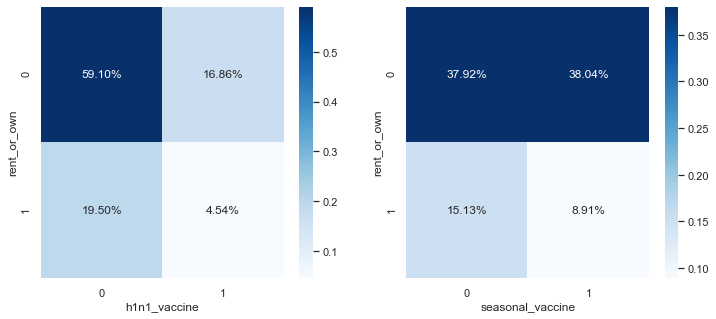

In [219]:
createTwoMatrix(dfc, "rent_or_own", "h1n1_vaccine", "seasonal_vaccine")

In [220]:
dfc['rent_or_own'] = dfc.apply(lambda row: 1 if row.rent_or_own == "Own" else
                               (0 if row.rent_or_own == "Rent" else np.nan), axis=1)

In [221]:
numerical.append('rent_or_own')

### Model rent_or_own

In [222]:
rentOwn = dfc[numerical]

rentOwn_test = rentOwn[rentOwn['rent_or_own'].isna()]
rentOwn_train = rentOwn[rentOwn['rent_or_own'].notna()]

rentOwn_test = rentOwn_test.drop(columns=["rent_or_own"])

# Drop rows with NA values
rentOwn_train = rentOwn_train.dropna()
rentOwn_test = rentOwn_test.dropna()

# Prep data for model
x1 = rentOwn_train.drop(columns=["rent_or_own"]).values
y1 = rentOwn_train["rent_or_own"].values
x2 = rentOwn_test.values

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

# Build model and fit it
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

# Make predictions
pred = model.predict(x_test)

print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))

accuracy: 0.7747263883259019
f1: 0.7305432273026324


In [223]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred)}, columns=['y_test', 'pred'])

dataset['1'] = 1

print("accuracy:", accuracy_score(y_test, dataset['1']))
print("f1:", f1_score(y_test, dataset['1'], average='weighted'))

accuracy: 0.7526347790839076
f1: 0.6464086156988935


In [224]:
model.fit(x1, y1)
pred = model.predict(x2)

In [225]:
rentOwn_test['Imp_rent_or_own'] = pred

rentOwn_test = rentOwn_test[['Imp_rent_or_own']]

In [226]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, rentOwn_test], axis=1)

# Fill NA values in Imp_occ_pos_vacc with values, if no value impute 0
dfc['Imp_rent_or_own'] = dfc.apply(lambda row: row.Imp_rent_or_own if row.Imp_rent_or_own == row.Imp_rent_or_own else
                                        (row.rent_or_own if row.rent_or_own == row.rent_or_own else 1), axis = 1)

# Add the new column to the numerical list
numerical.append('Imp_rent_or_own')

categorical.remove('rent_or_own')
numerical.remove('rent_or_own')

Options:
1. Imp_rent_or_own

In [227]:
dfc.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Imp_opinion_h1n1_sick_from_vacc,Imp_opinion_seas_vacc_effective,Imp_household_adults,Imp_household_children,occ_pos_vacc,occ_pos_seas,ind_pos_vacc,ind_pos_seas,Imp_income_poverty,Imp_rent_or_own
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,2.0,0.0,0.0,0,1,0,1,-1.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,4.0,0.0,0.0,0,0,0,0,-1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,4.0,2.0,0.0,0,0,0,0,0.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5.0,5.0,0.0,0.0,0,1,0,1,-1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,3.0,1.0,0.0,0,0,0,0,0.0,1.0


In [228]:
dfc[categorical].isna().sum().sort_values(ascending=False)

employment_status    2934
marital_status       2850
education            2814
age_group               0
race                    0
sex                     0
hhs_geo_region          0
census_msa              0
dtype: int64

### employment_status

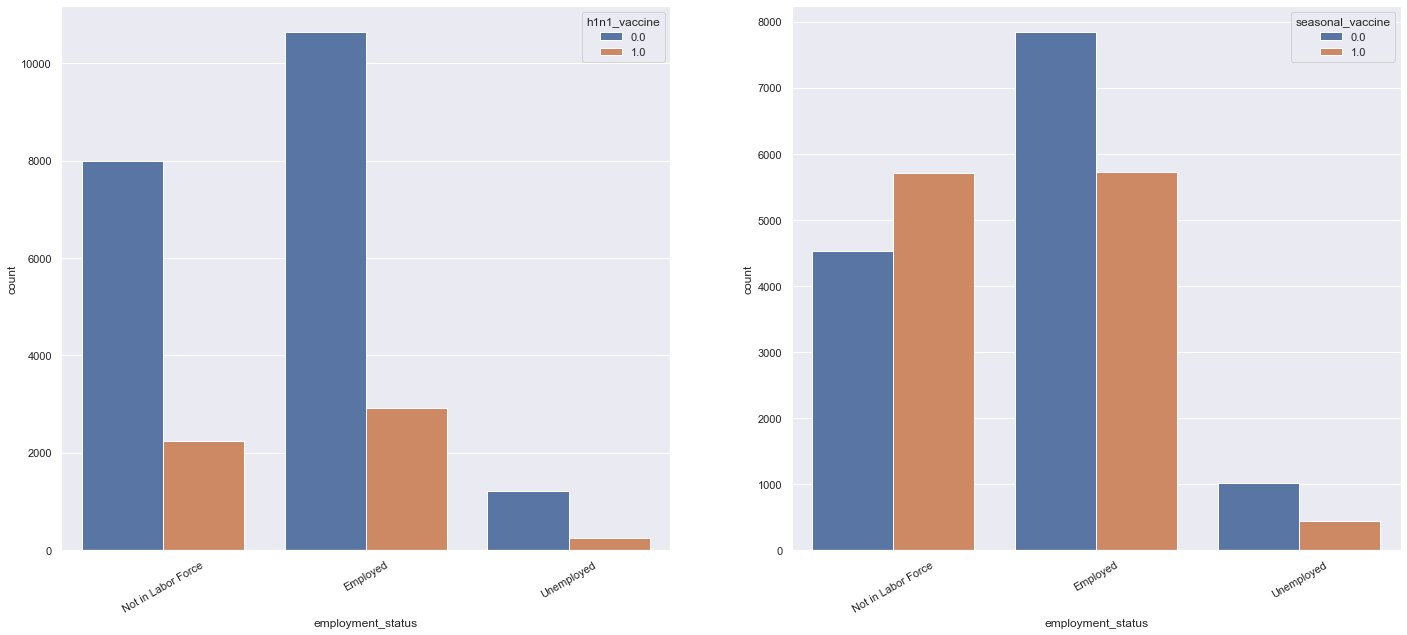

In [229]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,10))

sns.set(rc={'figure.figsize':(8,8)})
plot = sns.countplot(x="employment_status", hue="h1n1_vaccine", data=dfc, ax=ax1)
plt.setp(plot.get_xticklabels(), rotation=30)

sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="employment_status", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.xticks(rotation=30);

plt.show()

In [230]:
# Create new dataframe with industry and both vaccines
emp = dfc[["employment_status"]]

# Create new dataframe with one hot encoded columns
emp = pd.get_dummies(emp[['employment_status']], prefix='OHE_')

# Merge the two dataframes
dfc = pd.concat([dfc,emp],axis=1)

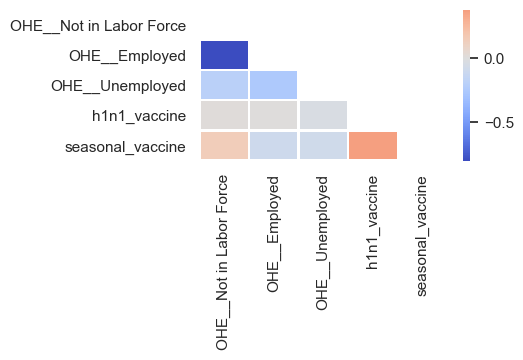

In [231]:
sns.set_theme(style="white")
sns.set_style("white")

correlation = dfc[['OHE__Not in Labor Force','OHE__Employed',
 'OHE__Unemployed','h1n1_vaccine','seasonal_vaccine']].corr(method="spearman")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(4,2), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=False, center=0, linewidths=1, fmt=".2f")

In [232]:
numerical.append('OHE__Not in Labor Force')
numerical.append('OHE__Employed')
numerical.append('OHE__Unemployed')

categorical.remove('employment_status')

Options:
1. use 'OHE__Not in Labor Force','OHE__Employed', 'OHE__Unemployed'
2. drop, the one OHE column with a slight bigger correlation is probably highly correlated itself with age

In [233]:
dfc[categorical].isna().sum().sort_values(ascending=False)

marital_status    2850
education         2814
age_group            0
race                 0
sex                  0
hhs_geo_region       0
census_msa           0
dtype: int64

### marital_status

<AxesSubplot:xlabel='marital_status', ylabel='count'>

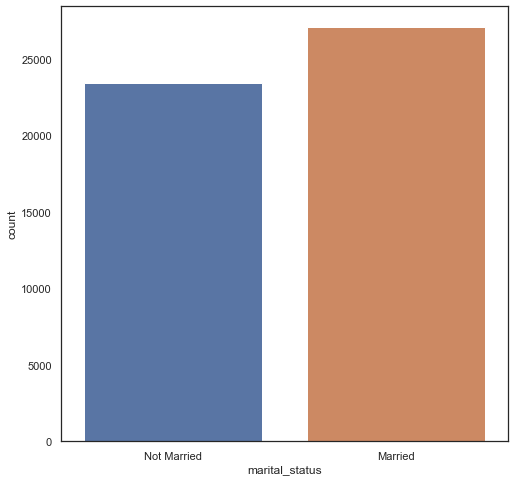

In [234]:
sns.countplot(x="marital_status", data=dfc)

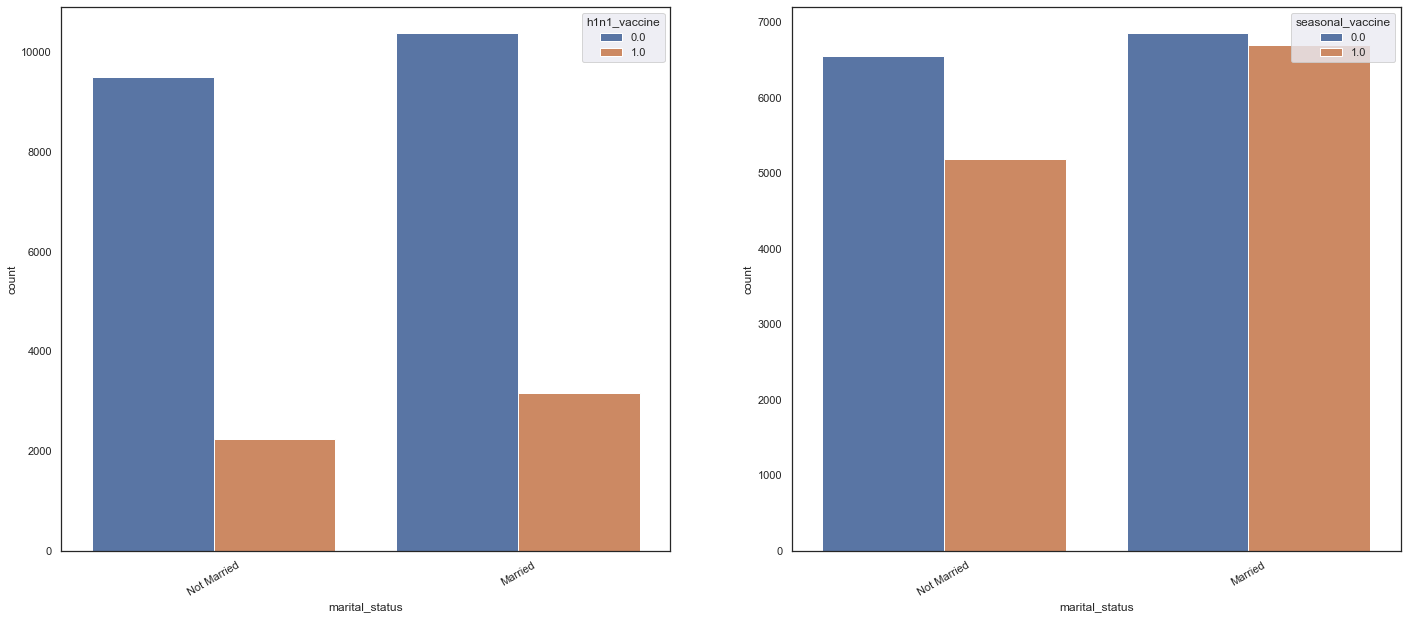

In [235]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,10))

sns.set(rc={'figure.figsize':(8,8)})
plot = sns.countplot(x="marital_status", hue="h1n1_vaccine", data=dfc, ax=ax1)
plt.setp(plot.get_xticklabels(), rotation=30)

sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="marital_status", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.xticks(rotation=30);

plt.show()

In [236]:
dfc['marital_status'] = dfc.apply(lambda row: 1 if row.marital_status == 'Married' else
                                 (0 if row.marital_status == 'Not Married' else np.nan), axis=1)

In [237]:
numerical.append('marital_status')

In [238]:
Mstatus = dfc[numerical]

Mstatus_test = Mstatus[Mstatus['marital_status'].isna()]
Mstatus_train = Mstatus[Mstatus['marital_status'].notna()]

Mstatus_test = Mstatus_test.drop(columns=["marital_status"])

# Drop rows with NA values
Mstatus_train = Mstatus_train.dropna()
Mstatus_test = Mstatus_test.dropna()

# Prep data for model
x1 = Mstatus_train.drop(columns=["marital_status"]).values
y1 = Mstatus_train["marital_status"].values
x2 = Mstatus_test.values

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

# Build model and fit it
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

# Make predictions
pred = model.predict(x_test)

print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))

accuracy: 0.7930386631068921
f1: 0.7920856191686688


In [239]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred)}, columns=['y_test', 'pred'])

dataset['1'] = 1

print("accuracy:", accuracy_score(y_test, dataset['1']))
print("f1:", f1_score(y_test, dataset['1'], average='weighted'))

accuracy: 0.539009196084248
f1: 0.3775557861546179


In [240]:
model.fit(x1, y1)

# Make predictions
pred = model.predict(x2)

# Add toImpute list as 'Imp_occ_pos_vacc' column to empl_occ_test dataframe
Mstatus_test['Imp_marital_status'] = pred

Mstatus_test = Mstatus_test[['Imp_marital_status']]

In [241]:
# Merge the two dataframes so that column is added
dfc = pd.concat([dfc, Mstatus_test], axis=1)

# Fill NA values in Imp_occ_pos_vacc with values, if no value impute 0
dfc['Imp_marital_status'] = dfc.apply(lambda row: row.Imp_marital_status if row.Imp_marital_status == row.Imp_marital_status else
                                        (row.marital_status if row.marital_status == row.marital_status else 1), axis = 1)

# Add the new column to the numerical list
numerical.append('Imp_marital_status')
numerical.remove('marital_status')

categorical.remove('marital_status')

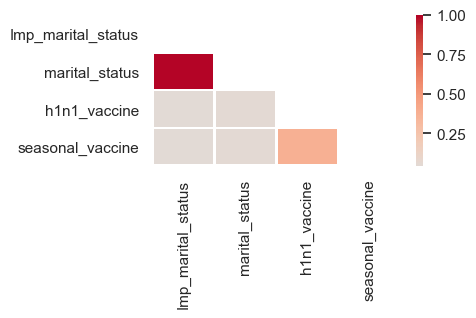

In [242]:
sns.set_theme(style="white")
sns.set_style("white")

correlation = dfc[['Imp_marital_status','marital_status','h1n1_vaccine','seasonal_vaccine']].corr(method="spearman")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(4,2), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=False, center=0, linewidths=1, fmt=".2f")

Options:
1. Imp_marital_status
2. drop, seems not to add a lot of value

In [243]:
dfc[categorical].isna().sum().sort_values(ascending=False)

education         2814
age_group            0
race                 0
sex                  0
hhs_geo_region       0
census_msa           0
dtype: int64

### Education

<AxesSubplot:xlabel='education', ylabel='count'>

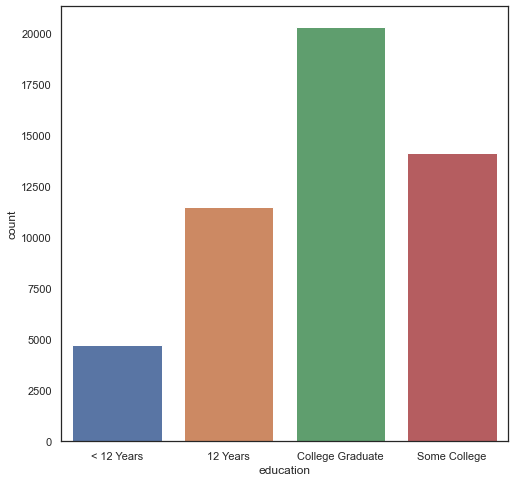

In [244]:
sns.countplot(x="education", data=dfc)

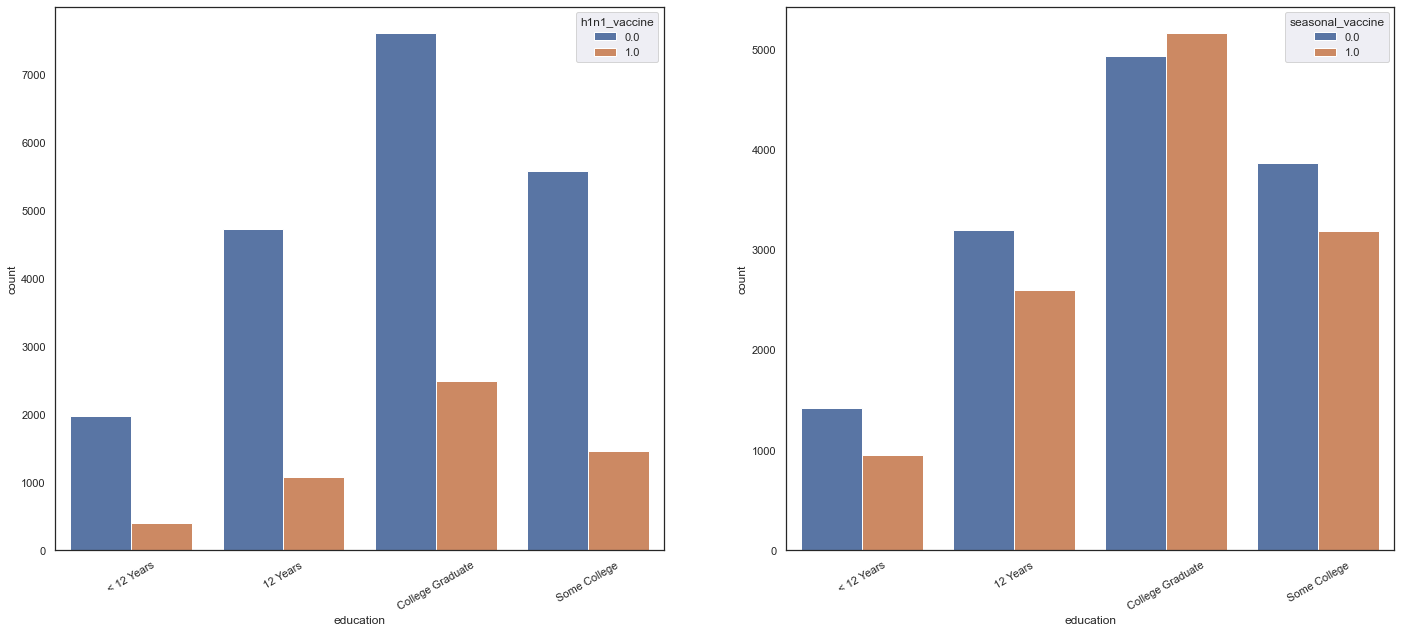

In [245]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,10))

sns.set(rc={'figure.figsize':(8,8)})
plot = sns.countplot(x="education", hue="h1n1_vaccine", data=dfc, ax=ax1)
plt.setp(plot.get_xticklabels(), rotation=30)

sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="education", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.xticks(rotation=30);

plt.show()

In [246]:
dfc['edu'] = dfc.apply(lambda row: 1 if row.education == '< 12 Years' else
                      (2 if row.education == '12 Years' else
                      (3 if row.education == 'Some College' else
                      (4 if row.education == "College Graduate" else np.nan))), axis = 1)

In [247]:
numerical.append('edu')

In [248]:
edu = dfc[numerical]

edu_test = edu[edu['edu'].isna()]
edu_train = edu[edu['edu'].notna()]

edu_test = edu_test.drop(columns=["edu"])

# Drop rows with NA values
edu_train = edu_train.dropna()
edu_test = edu_test.dropna()

# Prep data for model
x1 = edu_train.drop(columns=["edu"]).values
y1 = edu_train["edu"].values
x2 = edu_test.values

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

# Build model and fit it
forest = RandomForestClassifier(n_estimators = 150, max_depth=10, random_state=4)
forest.fit(x_train, y_train)

# Make predictions
pred = forest.predict(x_test)

print("accuracy:", accuracy_score(y_test, pred))
print("f1:", f1_score(y_test, pred, average='weighted'))

accuracy: 0.4795968777788756
f1: 0.4376424480893108


In [249]:
dataset = pd.DataFrame({'y_test': list(y_test), 'pred': list(pred)}, columns=['y_test', 'pred'])

dataset['1'] = 4

print("accuracy:", accuracy_score(y_test, dataset['1']))
print("f1:", f1_score(y_test, dataset['1'], average='weighted'))

accuracy: 0.40233178539669995
f1: 0.2308595829120499


In [250]:
forest.fit(x1, y1)

pred = forest.predict(x2)

In [251]:
edu_test['Imp_edu'] = pred

edu_test = edu_test[['Imp_edu']]

In [252]:
dfc = pd.concat([dfc,edu_test],axis=1)

In [253]:
# Fill NA values in Imp_doctor_recc_h1n1 with values, if no value impute 0
dfc['Imp_edu'] = dfc.apply(lambda row: row.Imp_edu if row.Imp_edu == row.Imp_edu else
                                        (row.edu if row.edu == row.edu else 4), axis = 1)

In [254]:
dfc.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,ind_pos_vacc,ind_pos_seas,Imp_income_poverty,Imp_rent_or_own,OHE__Employed,OHE__Not in Labor Force,OHE__Unemployed,Imp_marital_status,edu,Imp_edu
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,-1.0,1.0,0,1,0,0.0,1.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,-1.0,0.0,1,0,0,0.0,2.0,2.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,0.0,1.0,1,0,0,0.0,4.0,4.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,-1.0,0.0,0,1,0,0.0,2.0,2.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0.0,1.0,1,0,0,1.0,3.0,3.0


In [255]:
numerical.append('Imp_edu')
numerical.remove('edu')
categorical.remove('education')

Options:
1. Imp_edu

### Age_group

<AxesSubplot:xlabel='age_group', ylabel='count'>

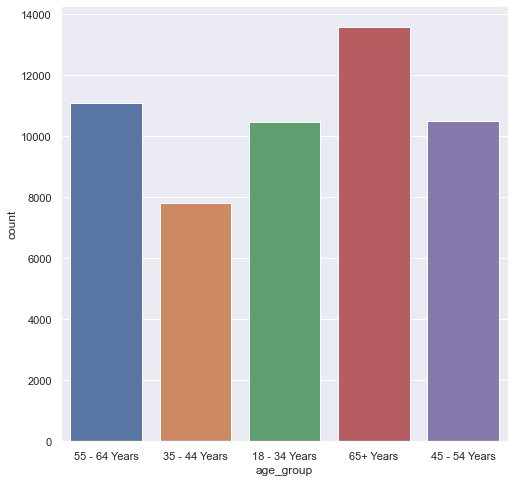

In [256]:
sns.countplot(x="age_group", data=dfc)

In [257]:
dfc['age'] = dfc.apply(lambda row: 40 if row.age_group == '35 - 44 Years' else
                      (50 if row.age_group == '45 - 54 Years' else
                      (60 if row.age_group == '55 - 64 Years' else
                      (70 if row.age_group == '65+ Years' else 26))), axis = 1)

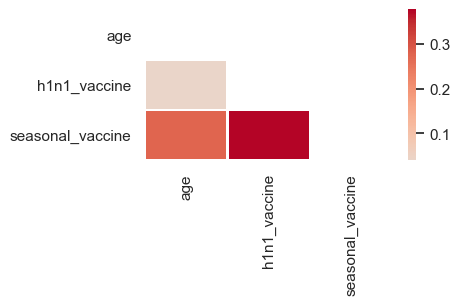

In [258]:
sns.set_theme(style="white")
sns.set_style("white")

correlation = dfc[['age','h1n1_vaccine','seasonal_vaccine']].corr(method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(4,2), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=False, center=0, linewidths=1, fmt=".2f")

In [259]:
numerical.append('age')
categorical.remove('age_group')

### race

<AxesSubplot:xlabel='race', ylabel='count'>

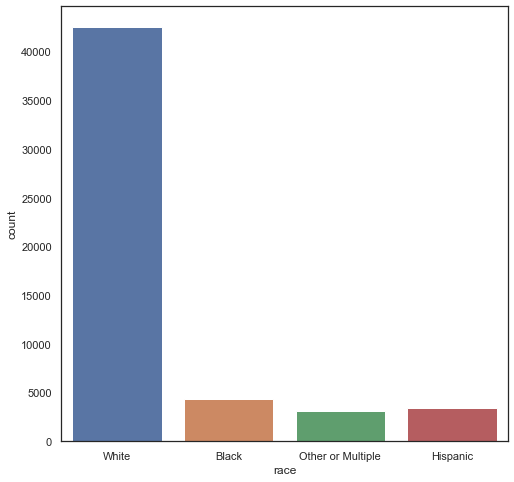

In [260]:
sns.countplot(x="race", data=dfc)

In [261]:
# Create new dataframe with industry and both vaccines
race = dfc[["race"]]

# Create new dataframe with one hot encoded columns
race = pd.get_dummies(race[['race']], drop_first = True, prefix='OHE_')

# Merge the two dataframes
dfc = pd.concat([dfc,race],axis=1)

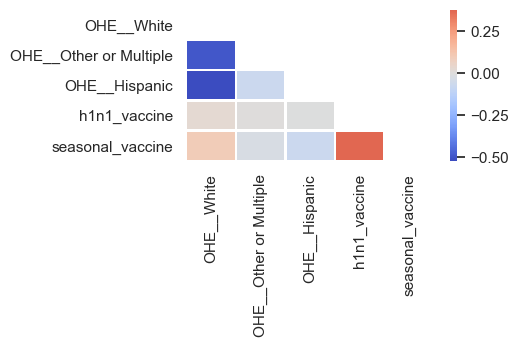

In [262]:
sns.set_theme(style="white")
sns.set_style("white")

correlation = dfc[['OHE__White','OHE__Other or Multiple','OHE__Hispanic','h1n1_vaccine','seasonal_vaccine']].corr(method="spearman")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(4,2), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=False, center=0, linewidths=1, fmt=".2f")

In [263]:
numerical.append('OHE__White')
numerical.append('OHE__Other or Multiple')
numerical.append('OHE__Hispanic')

categorical.remove('race')

Options:
1. 'OHE__White','OHE__Other or Multiple','OHE__Hispanic'
2. possible use binary, 1 for white, others 0. Not yet created

### Sex

<AxesSubplot:xlabel='sex', ylabel='count'>

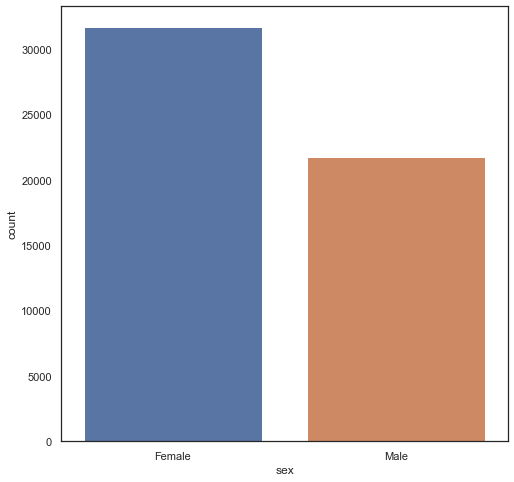

In [264]:
sns.countplot(x="sex", data=dfc)

In [265]:
dfc['sex'] = dfc.apply(lambda row: 1 if row.sex =='Female' else 0, axis=1)

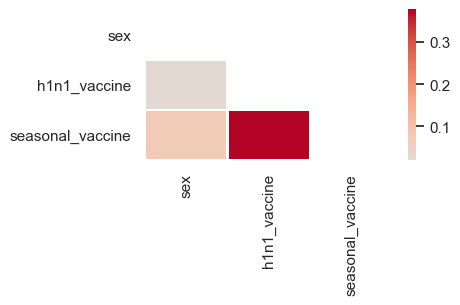

In [266]:
sns.set_theme(style="white")
sns.set_style("white")

correlation = dfc[['sex','h1n1_vaccine','seasonal_vaccine']].corr(method="spearman")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(4,2), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=False, center=0, linewidths=1, fmt=".2f")

In [280]:
numerical.append('sex')

### hhs_geo_region

<AxesSubplot:xlabel='hhs_geo_region', ylabel='count'>

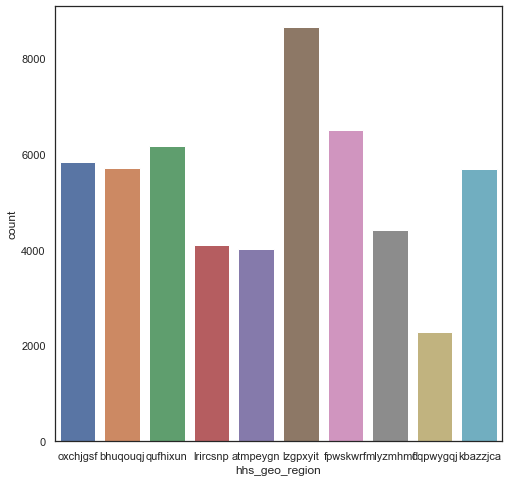

In [267]:
sns.countplot(x="hhs_geo_region", data=dfc)

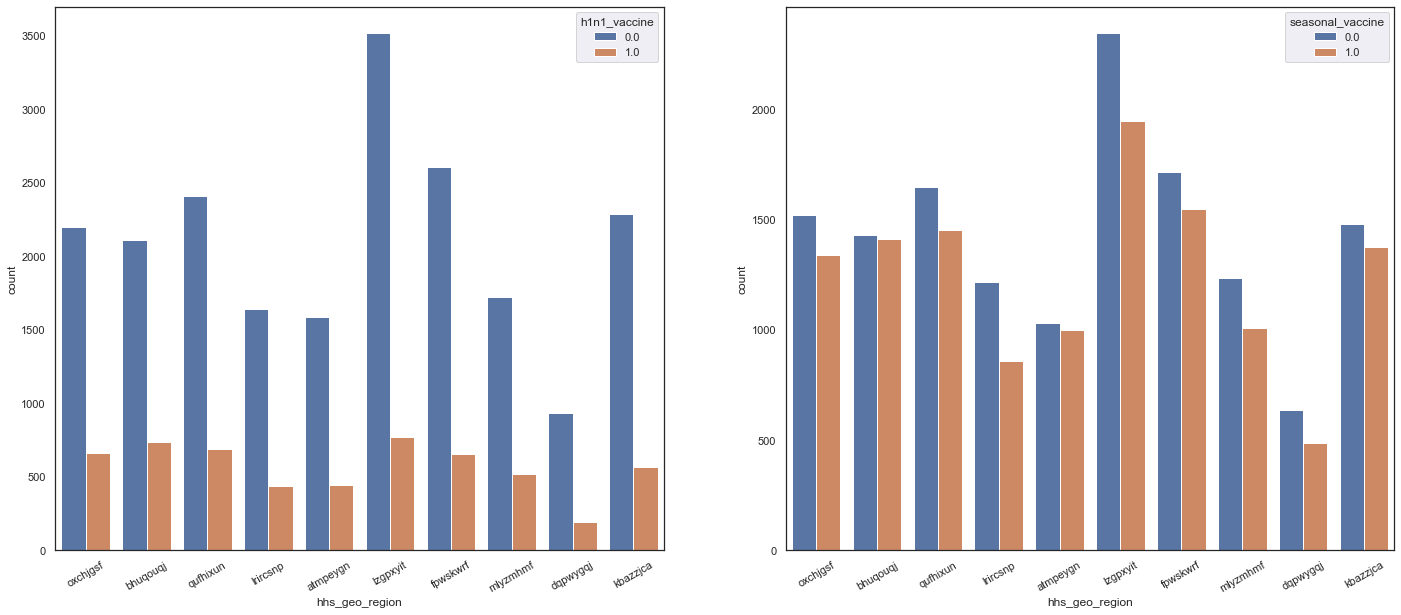

In [268]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,10))

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.countplot(x="hhs_geo_region", hue="h1n1_vaccine", data=dfc, ax=ax1)
plt.setp(plot.get_xticklabels(), rotation=30)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="hhs_geo_region", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.xticks(rotation=30);

plt.show()

In [269]:
regions = dfc['hhs_geo_region'].unique()

In [270]:
bench_h1n1 = 21.2453
bench_seasonal = 46.5608

positive_h1n1_region = []
positive_seasonal_region = []

for region in regions:
    tempDF = dfc[dfc['hhs_geo_region'] == region]
    one_h1n1 = tempDF[tempDF['h1n1_vaccine'] == 1]['h1n1_vaccine'].count()
    total_h1n1 = tempDF['h1n1_vaccine'].count()
    if one_h1n1/total_h1n1 *100 > bench_h1n1:
        positive_h1n1_region.append(region)

for region in regions:
    tempDF = dfc[dfc['hhs_geo_region'] == region]
    one_seasonal = tempDF[tempDF['seasonal_vaccine'] == 1]['seasonal_vaccine'].count()
    total_seasonal = tempDF['seasonal_vaccine'].count()
    if one_seasonal/total_seasonal *100 > bench_seasonal:
        positive_seasonal_region.append(region)

In [271]:
dfc['pos_regions'] = dfc.apply(lambda row: 1 if ((row.hhs_geo_region in positive_h1n1_region) & (row.hhs_geo_region in positive_seasonal_region)) else 0, axis=1)

In [272]:
numerical.append('pos_regions')

In [273]:
categorical.remove('hhs_geo_region')

Options:
1. pos_regions
2. drop

### census_msa

<AxesSubplot:xlabel='census_msa', ylabel='count'>

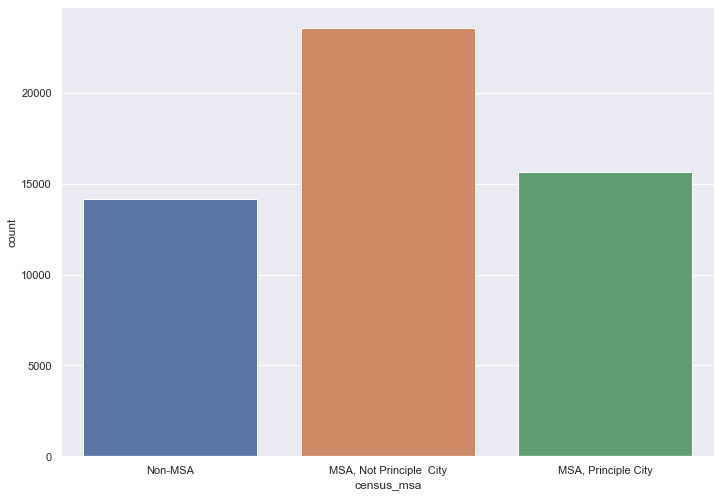

In [274]:
sns.countplot(x="census_msa", data=dfc)

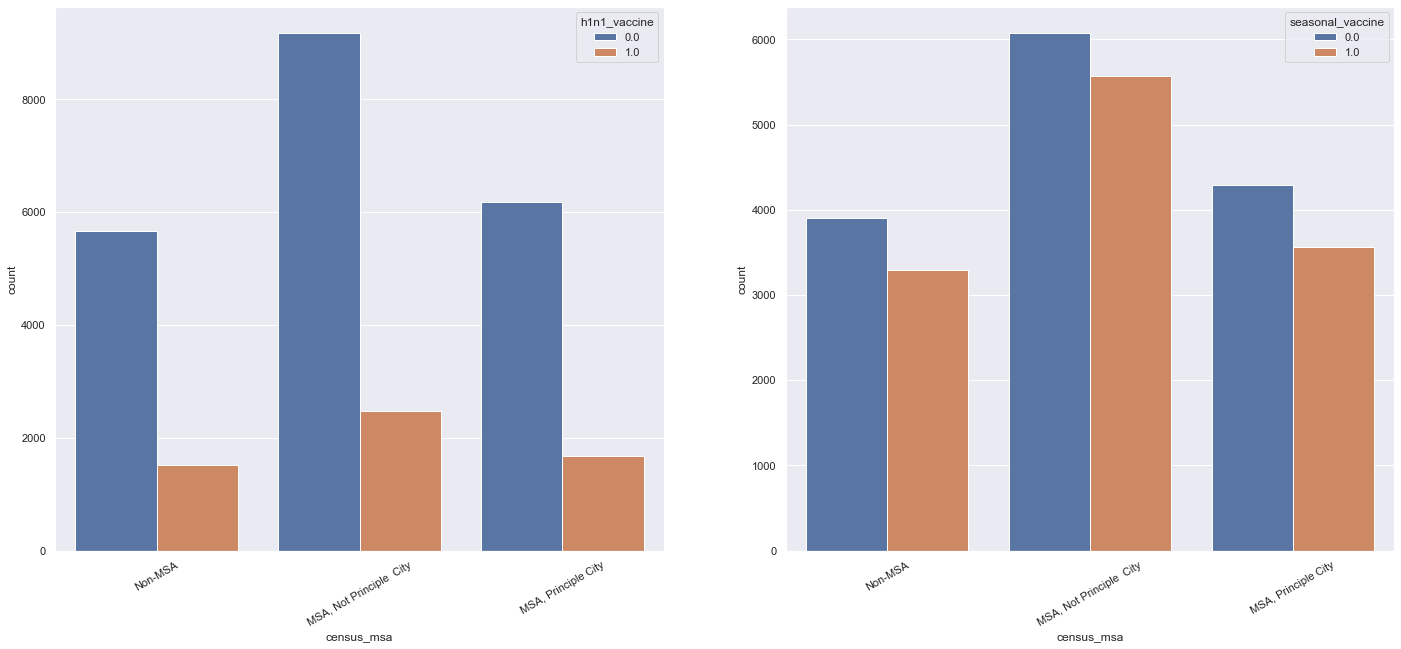

In [275]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,10))

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.countplot(x="census_msa", hue="h1n1_vaccine", data=dfc, ax=ax1)
plt.setp(plot.get_xticklabels(), rotation=30)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="census_msa", hue="seasonal_vaccine", data=dfc, ax=ax2)
plt.xticks(rotation=30);

plt.show()

In [276]:
# Create new dataframe with industry and both vaccines
msa = dfc[["census_msa"]]

# Create new dataframe with one hot encoded columns
msa = pd.get_dummies(msa[['census_msa']], drop_first = True, prefix='OHE_')

# Merge the two dataframes
dfc = pd.concat([dfc,msa],axis=1)

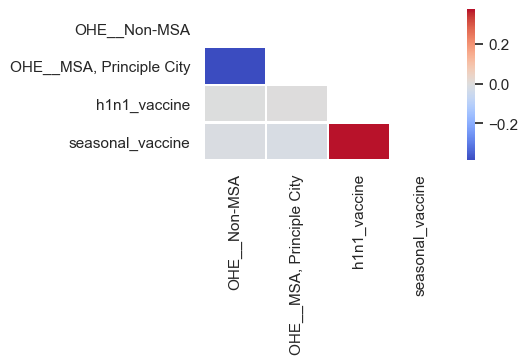

In [277]:
sns.set_theme(style="white")
sns.set_style("white")

correlation = dfc[['OHE__Non-MSA','OHE__MSA, Principle City','h1n1_vaccine','seasonal_vaccine']].corr(method="spearman")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(4,2), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", annot=False, center=0, linewidths=1, fmt=".2f")

Options:
1. drop column

## SAFE THE DATA

In [281]:
dfc[numerical].isna().sum().sort_values(ascending=False)

Imp_health_insurance               0
Imp_opinion_h1n1_risk              0
Imp_opinion_seas_vacc_effective    0
Imp_household_adults               0
Imp_household_children             0
occ_pos_vacc                       0
occ_pos_seas                       0
ind_pos_vacc                       0
ind_pos_seas                       0
Imp_income_poverty                 0
Imp_rent_or_own                    0
OHE__Not in Labor Force            0
OHE__Employed                      0
OHE__Unemployed                    0
Imp_marital_status                 0
Imp_edu                            0
age                                0
OHE__White                         0
OHE__Other or Multiple             0
OHE__Hispanic                      0
pos_regions                        0
Imp_opinion_h1n1_sick_from_vacc    0
Imp_opinion_h1n1_vacc_effective    0
health_insurance_1                 0
Imp_behavioral_touch_face          0
Imp_doctor_recc_h1n1               0
doctor_recc_h1n1_1                 0
I

In [283]:
numerical.append('h1n1_vaccine')
numerical.append('seasonal_vaccine')

In [284]:
dfc[numerical].to_csv("C:/Users/Meyke/Documents/Projecten/Vaccines/vaccines_all_columns.csv")